# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np
import joblib
%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
model = scPrint.load_from_checkpoint(
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/1tghqqzx_dir/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/vbd8bavn/checkpoints/epoch=19-step=100000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
MAXCELLS = 1024

[d3graph] INFO> Created a temporary directory at /local/scratch/tmp/tmpyk7t6bvc


[d3graph] INFO> Writing /local/scratch/tmp/tmpyk7t6bvc/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [3]:
#model.normalization = "sum"

In [4]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
    'endothelial cell'
]

In [5]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 15728 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leide

In [6]:
model.normalization = "log"


  0%|          | 0/54 [00:00<?, ?it/s]


  2%|▏         | 1/54 [00:02<02:09,  2.44s/it]


  4%|▎         | 2/54 [00:02<01:02,  1.19s/it]


  6%|▌         | 3/54 [00:03<00:39,  1.30it/s]


  7%|▋         | 4/54 [00:03<00:28,  1.75it/s]


  9%|▉         | 5/54 [00:03<00:28,  1.74it/s]


 11%|█         | 6/54 [00:04<00:22,  2.10it/s]


 13%|█▎        | 7/54 [00:04<00:19,  2.43it/s]


 15%|█▍        | 8/54 [00:05<00:33,  1.38it/s]


 17%|█▋        | 9/54 [00:06<00:26,  1.71it/s]


 19%|█▊        | 10/54 [00:06<00:21,  2.04it/s]


 20%|██        | 11/54 [00:07<00:25,  1.67it/s]


 22%|██▏       | 12/54 [00:07<00:21,  1.99it/s]


 24%|██▍       | 13/54 [00:07<00:17,  2.29it/s]


 26%|██▌       | 14/54 [00:08<00:15,  2.57it/s]


 28%|██▊       | 15/54 [00:08<00:14,  2.77it/s]


 30%|██▉       | 16/54 [00:08<00:13,  2.90it/s]


 31%|███▏      | 17/54 [00:08<00:12,  3.07it/s]


 33%|███▎      | 18/54 [00:09<00:11,  3.10it/s]


 35%|███▌      | 19/54 [00:09<00:10,  3.25it/s]


 37%|███▋      | 20/54 [00:09<00:10,  3.36it/s]


 39%|███▉      | 21/54 [00:10<00:09,  3.44it/s]


 41%|████      | 22/54 [00:10<00:09,  3.49it/s]


 43%|████▎     | 23/54 [00:10<00:08,  3.55it/s]


 44%|████▍     | 24/54 [00:10<00:08,  3.53it/s]


 46%|████▋     | 25/54 [00:11<00:08,  3.56it/s]


 48%|████▊     | 26/54 [00:14<00:29,  1.05s/it]


 50%|█████     | 27/54 [00:14<00:22,  1.23it/s]


 52%|█████▏    | 28/54 [00:15<00:21,  1.22it/s]


 54%|█████▎    | 29/54 [00:15<00:16,  1.53it/s]


 56%|█████▌    | 30/54 [00:15<00:12,  1.86it/s]


 57%|█████▋    | 31/54 [00:15<00:10,  2.18it/s]


 59%|█████▉    | 32/54 [00:16<00:10,  2.16it/s]


 61%|██████    | 33/54 [00:16<00:08,  2.43it/s]


 63%|██████▎   | 34/54 [00:17<00:07,  2.67it/s]


 65%|██████▍   | 35/54 [00:17<00:06,  2.90it/s]


 67%|██████▋   | 36/54 [00:17<00:05,  3.09it/s]


 69%|██████▊   | 37/54 [00:17<00:05,  3.24it/s]


 70%|███████   | 38/54 [00:18<00:04,  3.35it/s]


 72%|███████▏  | 39/54 [00:18<00:04,  3.43it/s]


 74%|███████▍  | 40/54 [00:18<00:04,  3.49it/s]


 76%|███████▌  | 41/54 [00:18<00:03,  3.54it/s]


 78%|███████▊  | 42/54 [00:19<00:03,  3.58it/s]


 80%|███████▉  | 43/54 [00:19<00:03,  3.52it/s]


 81%|████████▏ | 44/54 [00:19<00:02,  3.49it/s]


 83%|████████▎ | 45/54 [00:20<00:02,  3.47it/s]


 85%|████████▌ | 46/54 [00:20<00:02,  3.51it/s]


 87%|████████▋ | 47/54 [00:20<00:01,  3.53it/s]


 89%|████████▉ | 48/54 [00:20<00:01,  3.54it/s]


 91%|█████████ | 49/54 [00:21<00:01,  3.54it/s]


 93%|█████████▎| 50/54 [00:21<00:01,  3.49it/s]


 94%|█████████▍| 51/54 [00:21<00:00,  3.53it/s]


 96%|█████████▋| 52/54 [00:22<00:00,  3.51it/s]


 98%|█████████▊| 53/54 [00:24<00:00,  1.27it/s]


100%|██████████| 54/54 [00:24<00:00,  1.68it/s]


100%|██████████| 54/54 [00:24<00:00,  2.22it/s]

base enrichment


Top central genes: []


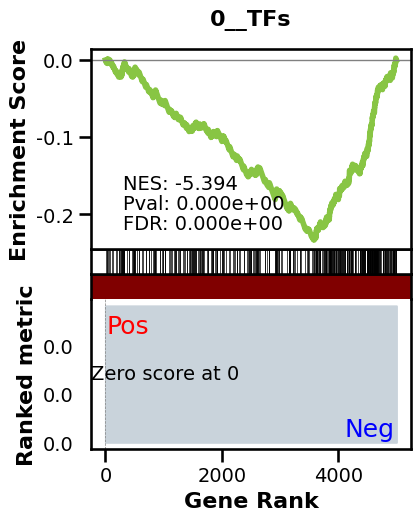

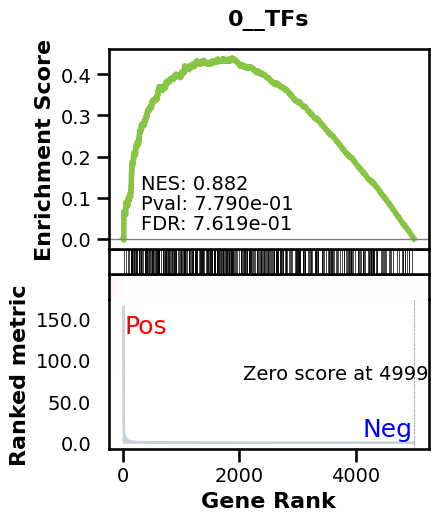

_________________________________________
TF specific enrichment


found some significant results for  14.705882352941176 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 59.10it/s]


  9%|▉         | 12/128 [00:00<00:01, 58.62it/s]


 14%|█▍        | 18/128 [00:00<00:01, 58.44it/s]


 19%|█▉        | 24/128 [00:00<00:01, 57.11it/s]


 23%|██▎       | 30/128 [00:00<00:01, 57.47it/s]


 28%|██▊       | 36/128 [00:00<00:01, 57.75it/s]


 33%|███▎      | 42/128 [00:00<00:01, 57.89it/s]


 38%|███▊      | 48/128 [00:00<00:01, 57.94it/s]


 42%|████▏     | 54/128 [00:00<00:01, 57.97it/s]


 47%|████▋     | 60/128 [00:01<00:01, 58.01it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 58.08it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 58.08it/s]


 61%|██████    | 78/128 [00:01<00:00, 58.08it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 58.05it/s]


 70%|███████   | 90/128 [00:01<00:00, 58.07it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 58.08it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 58.05it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 58.07it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 58.04it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 58.07it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 58.08it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 57.95it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0007981509093624338
EPR: 2.6620469453287052


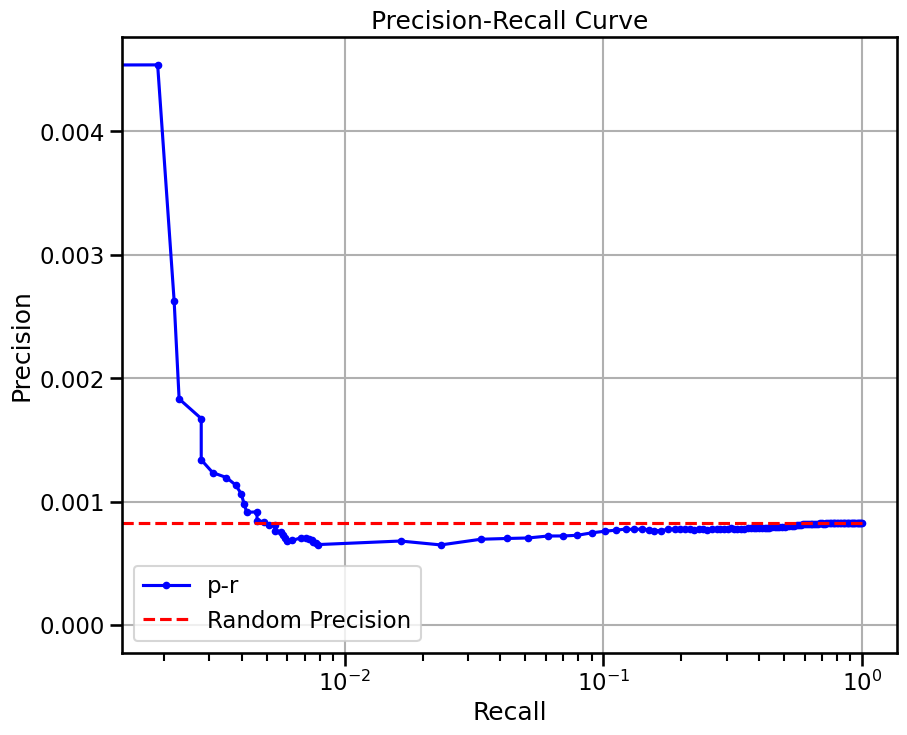

train classifier


true elem 10028 ...


doing classification....


metrics {'used_heads': 1, 'precision': 0.0008314620117426245, 'random_precision': 0.0008314620117426245, 'recall': 1.0, 'predicted_true': 4855303.0, 'number_of_true': 4037.0}


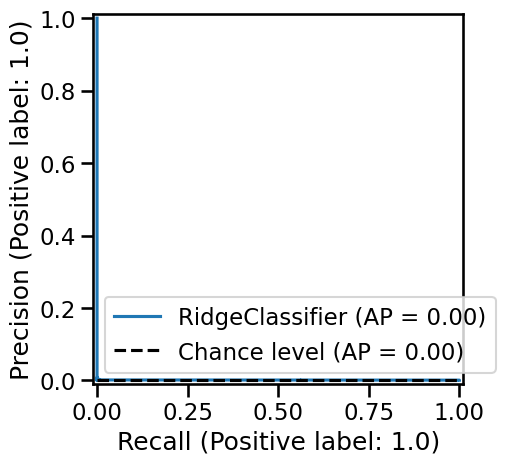

scprint_benchmark2
base enrichment


Top central genes: []


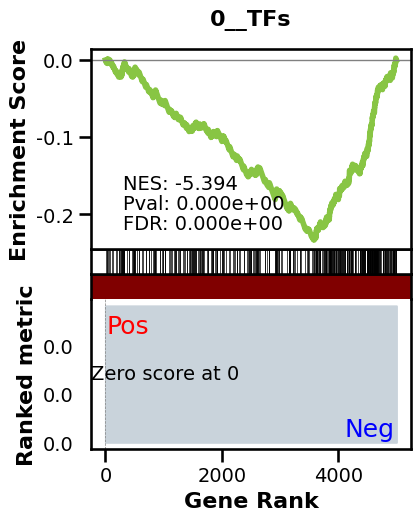

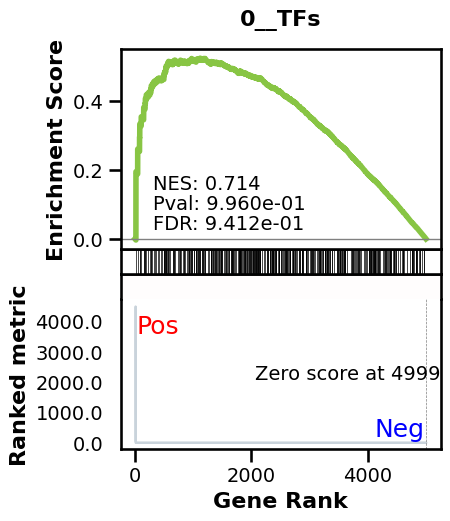

_________________________________________
TF specific enrichment


found some significant results for  17.647058823529413 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 59.96it/s]


 10%|█         | 13/128 [00:00<00:01, 60.16it/s]


 16%|█▌        | 20/128 [00:00<00:01, 60.25it/s]


 21%|██        | 27/128 [00:00<00:01, 60.27it/s]


 27%|██▋       | 34/128 [00:00<00:01, 60.29it/s]


 32%|███▏      | 41/128 [00:00<00:01, 60.29it/s]


 38%|███▊      | 48/128 [00:00<00:01, 59.90it/s]


 42%|████▏     | 54/128 [00:00<00:01, 59.54it/s]


 47%|████▋     | 60/128 [00:01<00:01, 59.54it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 59.32it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 59.48it/s]


 61%|██████    | 78/128 [00:01<00:00, 59.37it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 59.48it/s]


 70%|███████   | 90/128 [00:01<00:00, 59.63it/s]


 76%|███████▌  | 97/128 [00:01<00:00, 59.80it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 59.94it/s]


 87%|████████▋ | 111/128 [00:01<00:00, 59.99it/s]


 92%|█████████▏| 118/128 [00:01<00:00, 60.04it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 59.99it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 59.83it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0011100751091871006
EPR: 2.9052129647940905


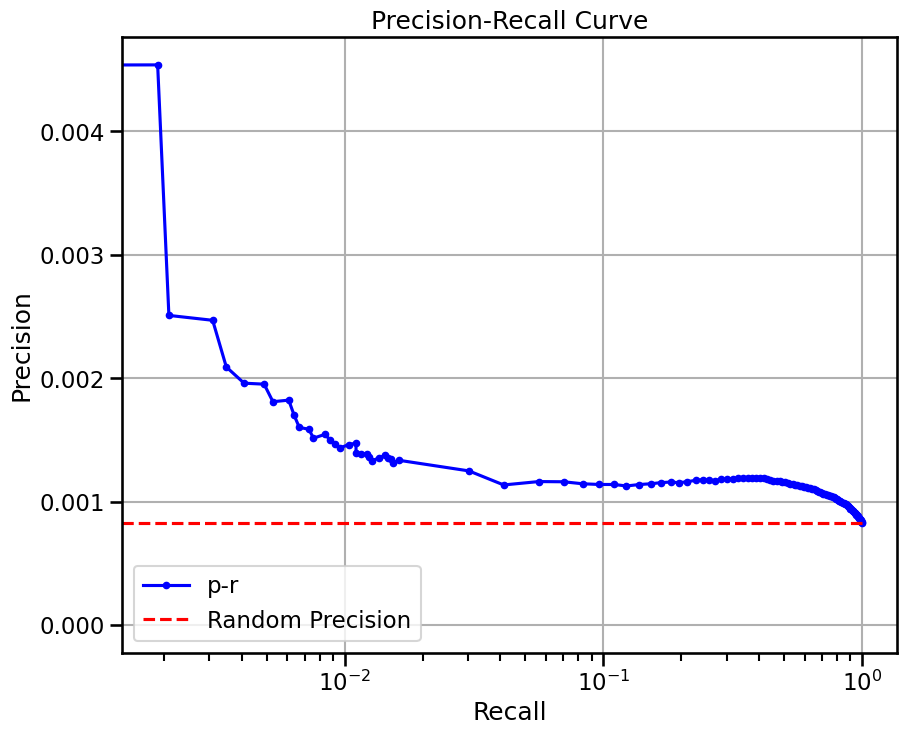


  0%|          | 0/17 [00:00<?, ?it/s]


  6%|▌         | 1/17 [00:01<00:17,  1.08s/it]


 12%|█▏        | 2/17 [00:01<00:09,  1.61it/s]


 18%|█▊        | 3/17 [00:01<00:06,  2.12it/s]


 24%|██▎       | 4/17 [00:01<00:05,  2.52it/s]


 29%|██▉       | 5/17 [00:02<00:05,  2.21it/s]


 35%|███▌      | 6/17 [00:02<00:04,  2.52it/s]


 41%|████      | 7/17 [00:03<00:03,  2.78it/s]


 47%|████▋     | 8/17 [00:03<00:03,  2.98it/s]


 53%|█████▎    | 9/17 [00:03<00:02,  3.12it/s]


 59%|█████▉    | 10/17 [00:03<00:02,  3.23it/s]


 65%|██████▍   | 11/17 [00:04<00:01,  3.33it/s]


 71%|███████   | 12/17 [00:04<00:01,  3.38it/s]


 76%|███████▋  | 13/17 [00:05<00:02,  1.76it/s]


 82%|████████▏ | 14/17 [00:05<00:01,  2.07it/s]


 88%|████████▊ | 15/17 [00:06<00:00,  2.35it/s]


 94%|█████████▍| 16/17 [00:06<00:00,  2.59it/s]


100%|██████████| 17/17 [00:06<00:00,  2.49it/s]

base enrichment


Top central genes: []


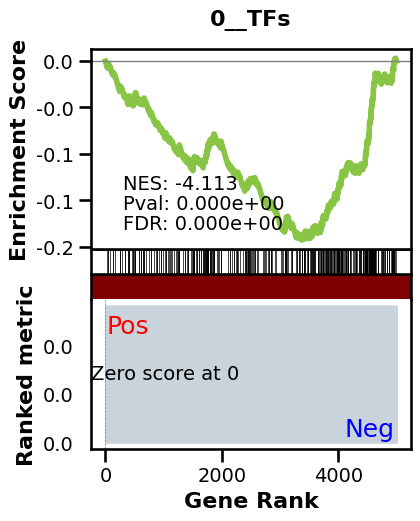

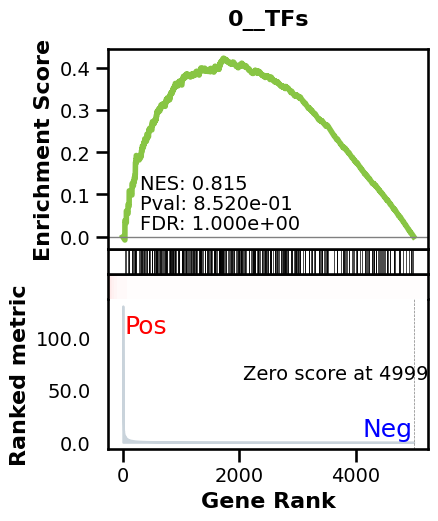

_________________________________________
TF specific enrichment


found some significant results for  23.076923076923077 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0008334948517653389 
recall:  1.0 
random precision: 0.0008337384212719915



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 60.97it/s]


 11%|█         | 14/128 [00:00<00:01, 60.91it/s]


 16%|█▋        | 21/128 [00:00<00:01, 60.85it/s]


 22%|██▏       | 28/128 [00:00<00:01, 60.82it/s]


 27%|██▋       | 35/128 [00:00<00:01, 60.80it/s]


 33%|███▎      | 42/128 [00:00<00:01, 60.76it/s]


 38%|███▊      | 49/128 [00:00<00:01, 60.80it/s]


 44%|████▍     | 56/128 [00:00<00:01, 60.82it/s]


 49%|████▉     | 63/128 [00:01<00:01, 60.84it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 60.85it/s]


 60%|██████    | 77/128 [00:01<00:00, 60.84it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 60.85it/s]


 71%|███████   | 91/128 [00:01<00:00, 60.85it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 60.84it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 60.85it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 60.90it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 60.91it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 60.86it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 60.80it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0007823651471201989
EPR: 3.4528813466952033


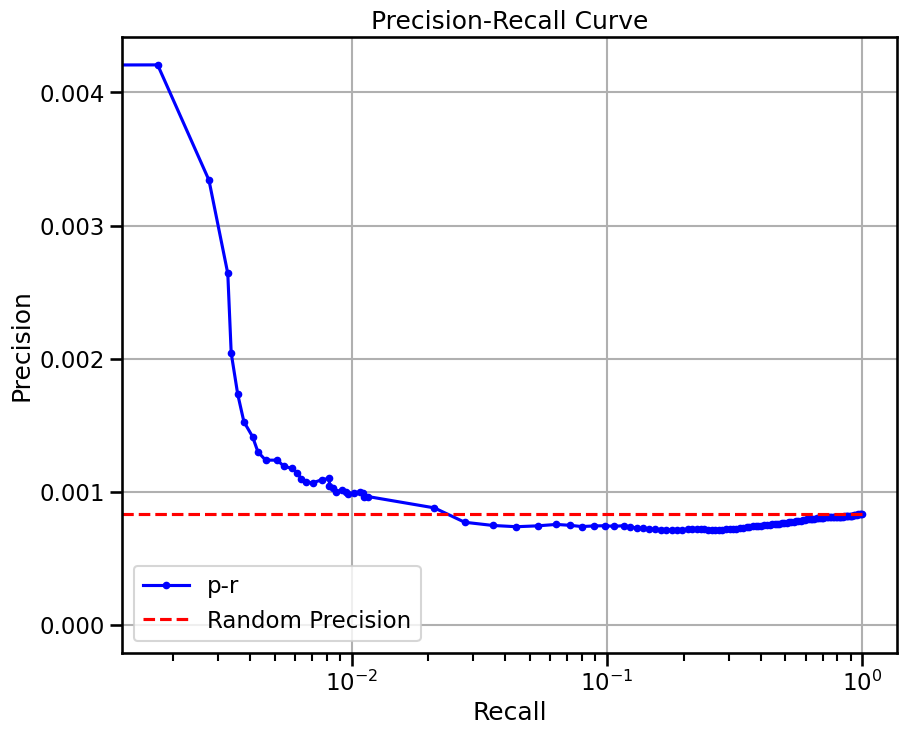

scprint_benchmark2
base enrichment


Top central genes: []


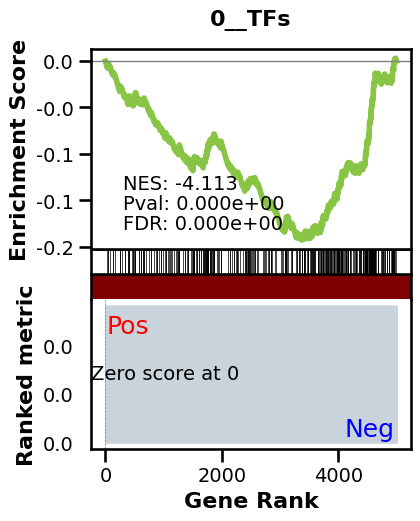

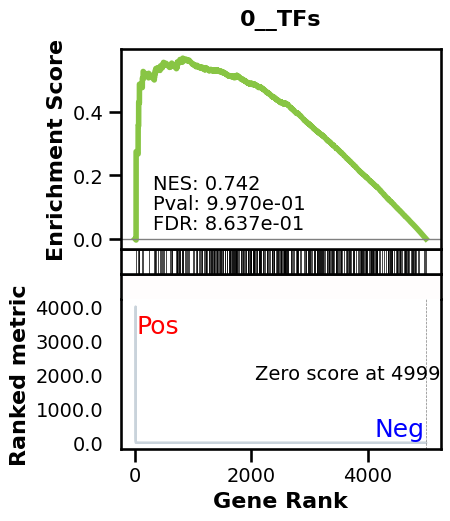

_________________________________________
TF specific enrichment


found some significant results for  26.923076923076923 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0008334948517653389 
recall:  1.0 
random precision: 0.0008337384212719915



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 59.85it/s]


 10%|█         | 13/128 [00:00<00:01, 60.15it/s]


 16%|█▌        | 20/128 [00:00<00:01, 60.87it/s]


 21%|██        | 27/128 [00:00<00:01, 60.60it/s]


 27%|██▋       | 34/128 [00:00<00:01, 60.74it/s]


 32%|███▏      | 41/128 [00:00<00:01, 61.10it/s]


 38%|███▊      | 48/128 [00:00<00:01, 60.94it/s]


 43%|████▎     | 55/128 [00:00<00:01, 60.82it/s]


 48%|████▊     | 62/128 [00:01<00:01, 60.76it/s]


 54%|█████▍    | 69/128 [00:01<00:00, 60.71it/s]


 59%|█████▉    | 76/128 [00:01<00:00, 60.68it/s]


 65%|██████▍   | 83/128 [00:01<00:00, 60.65it/s]


 70%|███████   | 90/128 [00:01<00:00, 60.60it/s]


 76%|███████▌  | 97/128 [00:01<00:00, 60.53it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 60.51it/s]


 87%|████████▋ | 111/128 [00:01<00:00, 60.52it/s]


 92%|█████████▏| 118/128 [00:01<00:00, 60.56it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 60.54it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 60.60it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0009668945432447371
EPR: 4.571185182797528


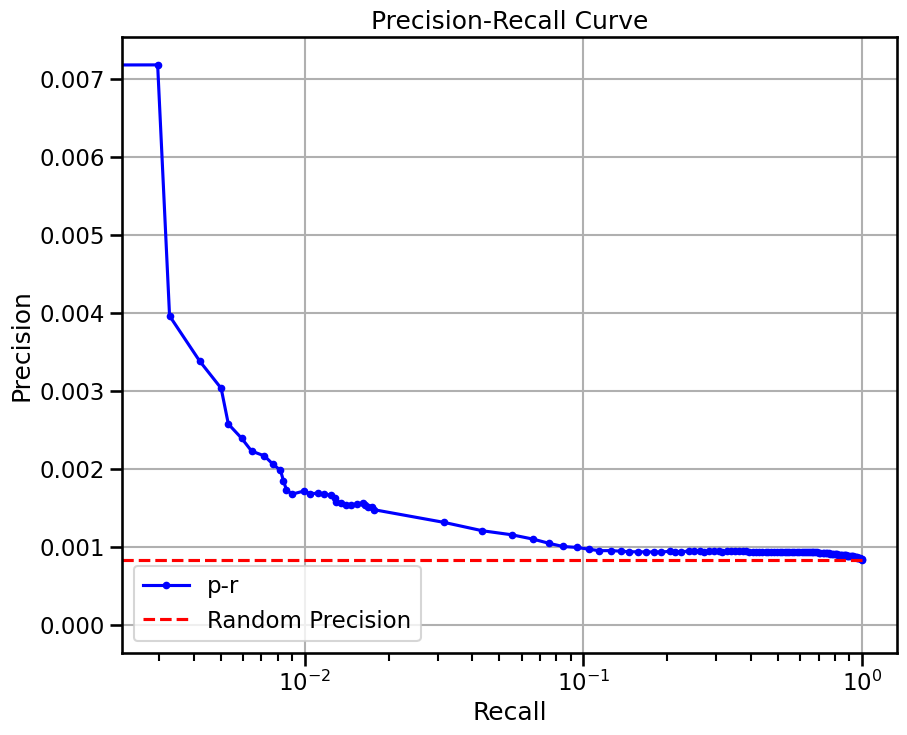


  0%|          | 0/22 [00:00<?, ?it/s]


  5%|▍         | 1/22 [00:02<00:51,  2.45s/it]


  9%|▉         | 2/22 [00:02<00:23,  1.18s/it]


 14%|█▎        | 3/22 [00:03<00:19,  1.00s/it]


 18%|█▊        | 4/22 [00:03<00:12,  1.40it/s]


 23%|██▎       | 5/22 [00:04<00:09,  1.80it/s]


 27%|██▋       | 6/22 [00:04<00:07,  2.18it/s]


 32%|███▏      | 7/22 [00:04<00:05,  2.50it/s]


 36%|███▋      | 8/22 [00:04<00:05,  2.77it/s]


 41%|████      | 9/22 [00:05<00:04,  3.00it/s]


 45%|████▌     | 10/22 [00:05<00:03,  3.18it/s]


 50%|█████     | 11/22 [00:05<00:03,  3.33it/s]


 55%|█████▍    | 12/22 [00:05<00:02,  3.42it/s]


 59%|█████▉    | 13/22 [00:06<00:02,  3.46it/s]


 64%|██████▎   | 14/22 [00:06<00:02,  3.51it/s]


 68%|██████▊   | 15/22 [00:09<00:07,  1.07s/it]


 73%|███████▎  | 16/22 [00:09<00:04,  1.21it/s]


 77%|███████▋  | 17/22 [00:09<00:03,  1.52it/s]


 82%|████████▏ | 18/22 [00:10<00:02,  1.80it/s]


 86%|████████▋ | 19/22 [00:10<00:01,  2.12it/s]


 91%|█████████ | 20/22 [00:10<00:00,  2.43it/s]


 95%|█████████▌| 21/22 [00:11<00:00,  2.70it/s]


100%|██████████| 22/22 [00:11<00:00,  3.10it/s]


100%|██████████| 22/22 [00:11<00:00,  1.92it/s]

base enrichment


Top central genes: []


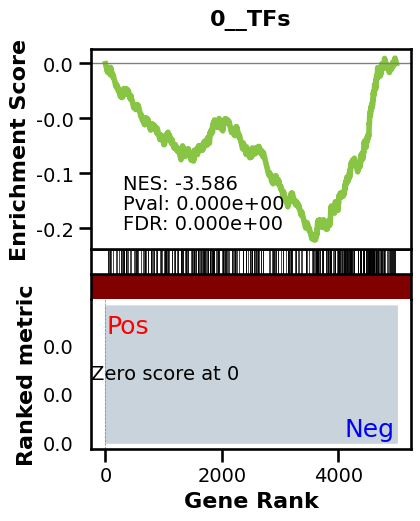

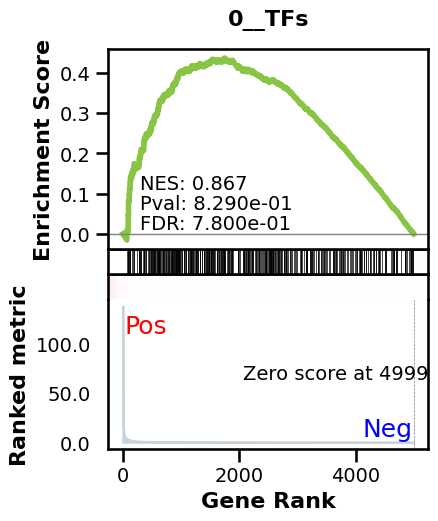

_________________________________________
TF specific enrichment


found some significant results for  14.0625 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.0012585320164533508 
recall:  1.0 
random precision: 0.001258889858937415



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.15it/s]


  9%|▉         | 12/128 [00:00<00:02, 53.92it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.51it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.85it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.00it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.11it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.18it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.24it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.29it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.30it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.31it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.23it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.22it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.34it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.57it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.70it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.80it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.86it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.76it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.15it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.21it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.24it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0012293764691315178
EPR: 1.1223094829183868


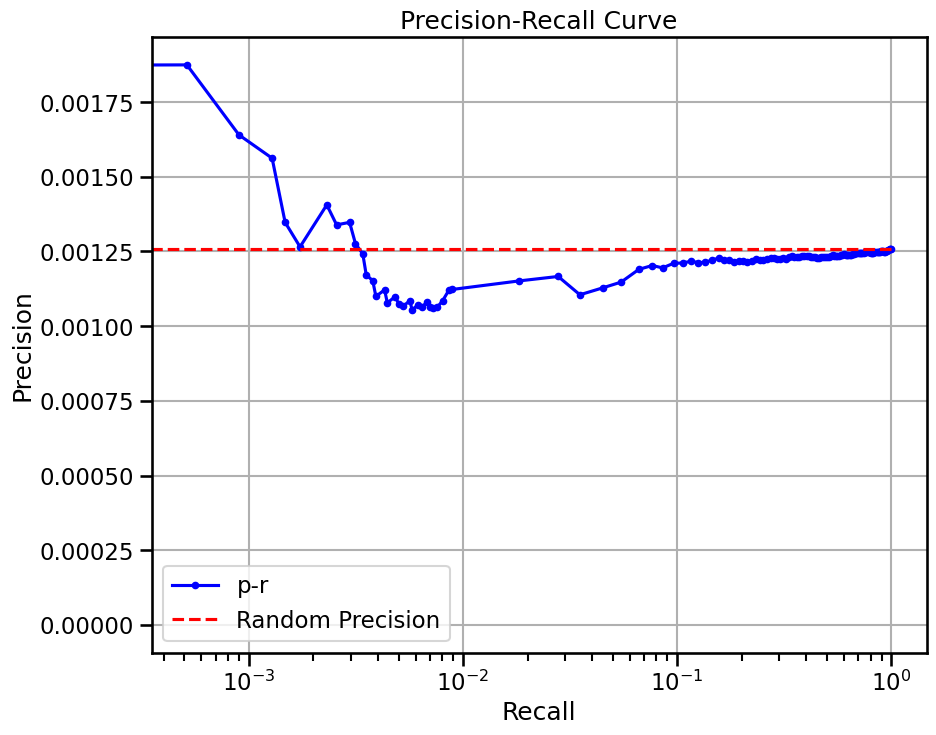

scprint_benchmark2
base enrichment


Top central genes: []


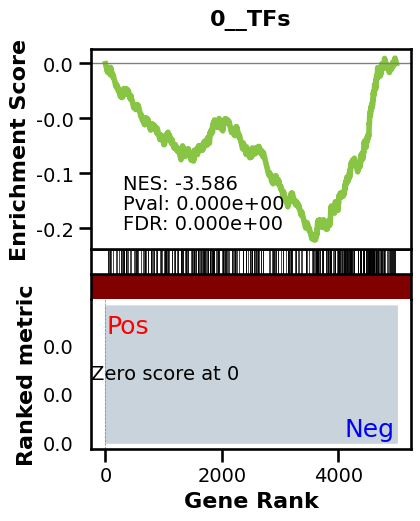

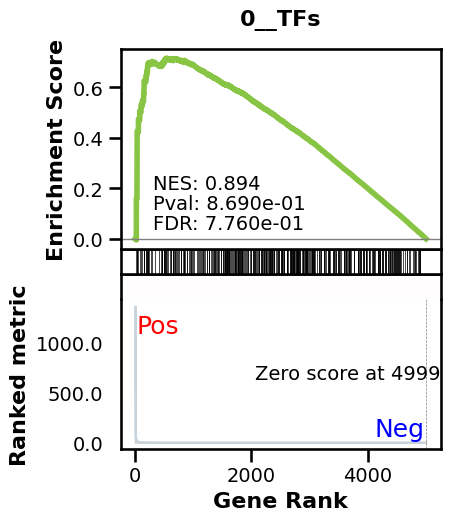

_________________________________________
TF specific enrichment


found some significant results for  29.6875 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.0012585320164533508 
recall:  1.0 
random precision: 0.001258889858937415



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 56.07it/s]


  9%|▉         | 12/128 [00:00<00:02, 56.14it/s]


 14%|█▍        | 18/128 [00:00<00:01, 56.14it/s]


 19%|█▉        | 24/128 [00:00<00:01, 56.11it/s]


 23%|██▎       | 30/128 [00:00<00:01, 56.11it/s]


 28%|██▊       | 36/128 [00:00<00:01, 56.10it/s]


 33%|███▎      | 42/128 [00:00<00:01, 56.09it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.98it/s]


 42%|████▏     | 54/128 [00:00<00:01, 56.04it/s]


 47%|████▋     | 60/128 [00:01<00:01, 56.08it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 56.11it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 56.14it/s]


 61%|██████    | 78/128 [00:01<00:00, 56.17it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 56.16it/s]


 70%|███████   | 90/128 [00:01<00:00, 56.14it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 56.10it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 56.07it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.76it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.84it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.94it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.99it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 56.02it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001771179443131485


EPR: 1.1223094829183868


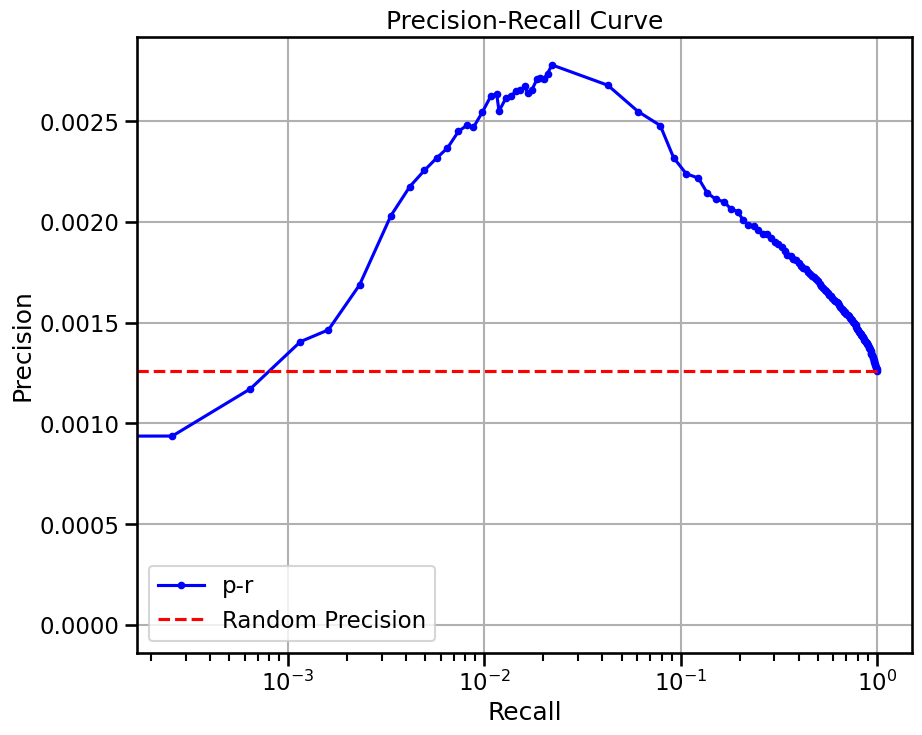


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:01<00:00,  1.17s/it]


100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

base enrichment


Top central genes: []


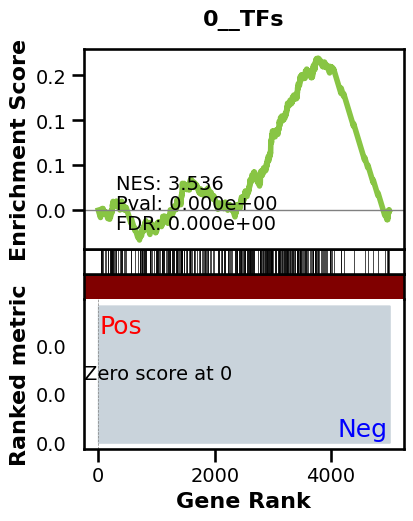

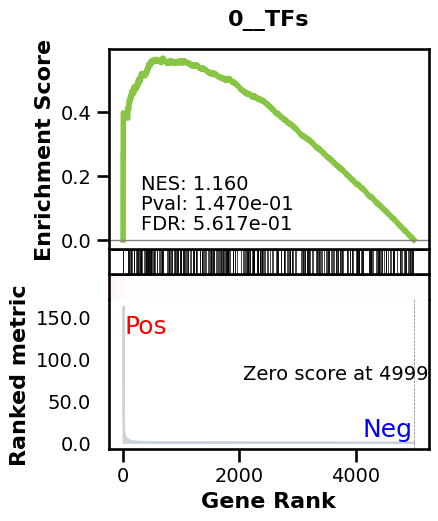

_________________________________________
TF specific enrichment


found some significant results for  15.625 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2812 genes
intersection pct: 0.5624
precision:  0.0010440926814363964 
recall:  1.0 
random precision: 0.0010444641124863559



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 91.10it/s]


 16%|█▌        | 20/128 [00:00<00:01, 90.96it/s]


 23%|██▎       | 30/128 [00:00<00:01, 90.82it/s]


 31%|███▏      | 40/128 [00:00<00:00, 90.86it/s]


 39%|███▉      | 50/128 [00:00<00:00, 90.91it/s]


 47%|████▋     | 60/128 [00:00<00:00, 90.88it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 90.88it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 90.89it/s]


 70%|███████   | 90/128 [00:00<00:00, 91.00it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 91.03it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 91.03it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 91.00it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 90.92it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0011712943598784279
EPR: 2.2089430445794345


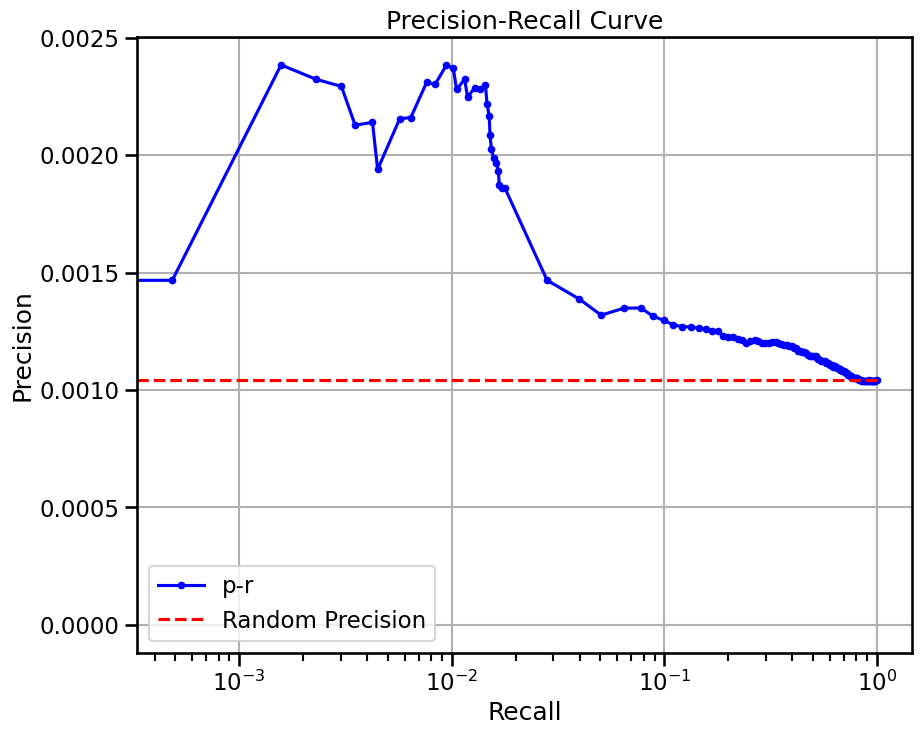

scprint_benchmark2
base enrichment


Top central genes: []


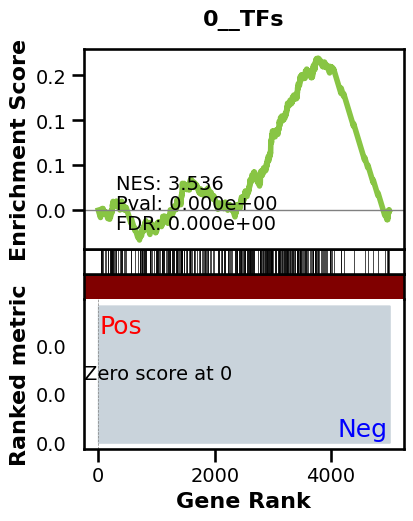

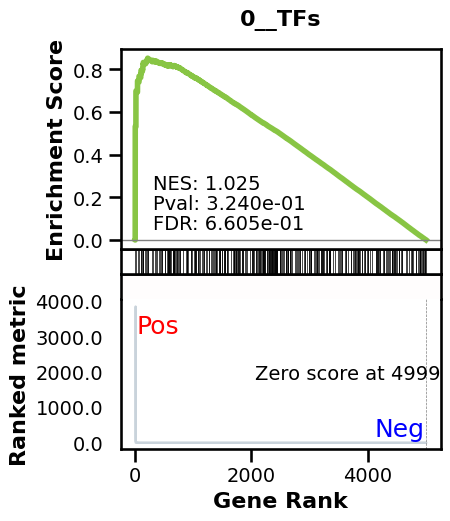

_________________________________________
TF specific enrichment


found some significant results for  46.875 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2812 genes
intersection pct: 0.5624
precision:  0.0010440926814363964 
recall:  1.0 
random precision: 0.0010444641124863559



  0%|          | 0/128 [00:00<?, ?it/s]


  7%|▋         | 9/128 [00:00<00:01, 89.67it/s]


 14%|█▍        | 18/128 [00:00<00:01, 89.84it/s]


 22%|██▏       | 28/128 [00:00<00:01, 89.97it/s]


 29%|██▉       | 37/128 [00:00<00:01, 89.36it/s]


 36%|███▌      | 46/128 [00:00<00:00, 89.55it/s]


 43%|████▎     | 55/128 [00:00<00:00, 89.65it/s]


 50%|█████     | 64/128 [00:00<00:00, 89.74it/s]


 58%|█████▊    | 74/128 [00:00<00:00, 89.78it/s]


 65%|██████▍   | 83/128 [00:00<00:00, 89.63it/s]


 72%|███████▏  | 92/128 [00:01<00:00, 89.70it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 89.88it/s]


 87%|████████▋ | 111/128 [00:01<00:00, 89.91it/s]


 95%|█████████▍| 121/128 [00:01<00:00, 90.00it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 89.72it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0018287615522350697
EPR: 3.262413533214424


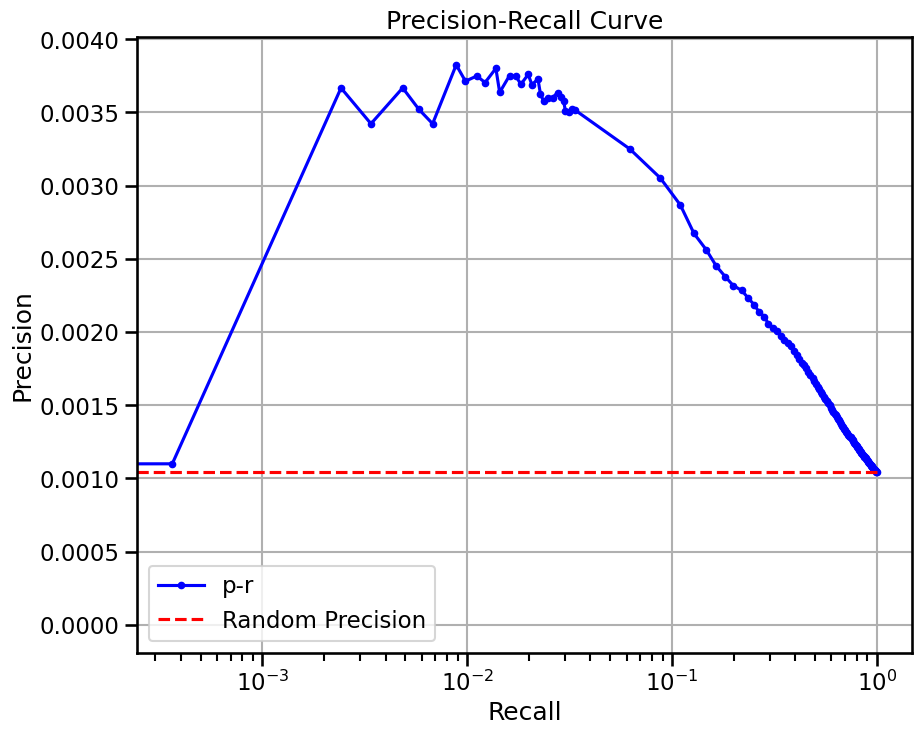


  0%|          | 0/14 [00:00<?, ?it/s]


  7%|▋         | 1/14 [00:01<00:22,  1.73s/it]


 14%|█▍        | 2/14 [00:02<00:10,  1.12it/s]


 21%|██▏       | 3/14 [00:02<00:06,  1.60it/s]


 29%|██▊       | 4/14 [00:02<00:05,  1.86it/s]


 36%|███▌      | 5/14 [00:03<00:04,  2.17it/s]


 43%|████▎     | 6/14 [00:03<00:03,  2.39it/s]


 50%|█████     | 7/14 [00:03<00:02,  2.57it/s]


 57%|█████▋    | 8/14 [00:04<00:02,  2.69it/s]


 64%|██████▍   | 9/14 [00:04<00:01,  2.78it/s]


 71%|███████▏  | 10/14 [00:04<00:01,  2.85it/s]


 79%|███████▊  | 11/14 [00:05<00:01,  2.91it/s]


 86%|████████▌ | 12/14 [00:05<00:00,  2.95it/s]


 93%|█████████▎| 13/14 [00:05<00:00,  2.97it/s]


100%|██████████| 14/14 [00:05<00:00,  3.22it/s]


100%|██████████| 14/14 [00:06<00:00,  2.29it/s]

base enrichment


Top central genes: []


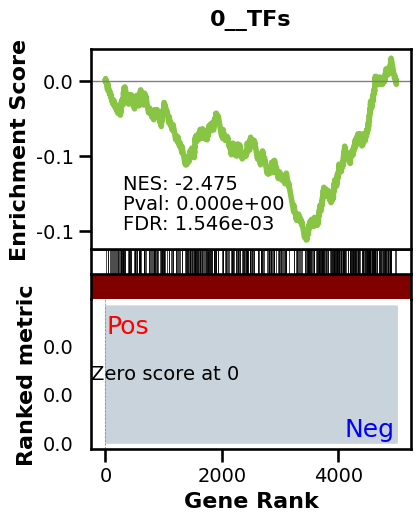

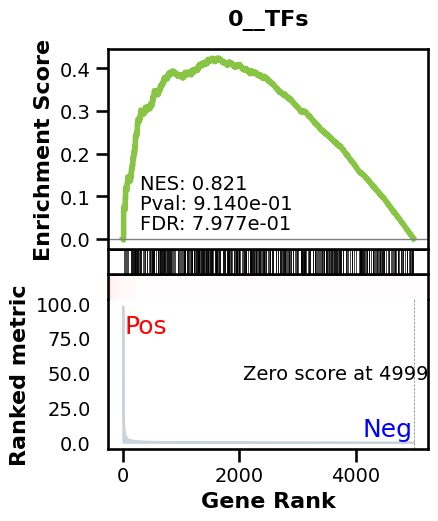

_________________________________________
TF specific enrichment


found some significant results for  36.36363636363637 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.0015724456206874184 
recall:  1.0 
random precision: 0.0015728901911201826



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 53.65it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.19it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.44it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.55it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.57it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.56it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.58it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.59it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.61it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.61it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.41it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 54.38it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.46it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 54.41it/s]


 70%|███████   | 90/128 [00:01<00:00, 53.93it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 53.71it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 53.58it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 53.47it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 53.65it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 53.81it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 53.94it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.14it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0015796935488519392
EPR: 2.139466984837946


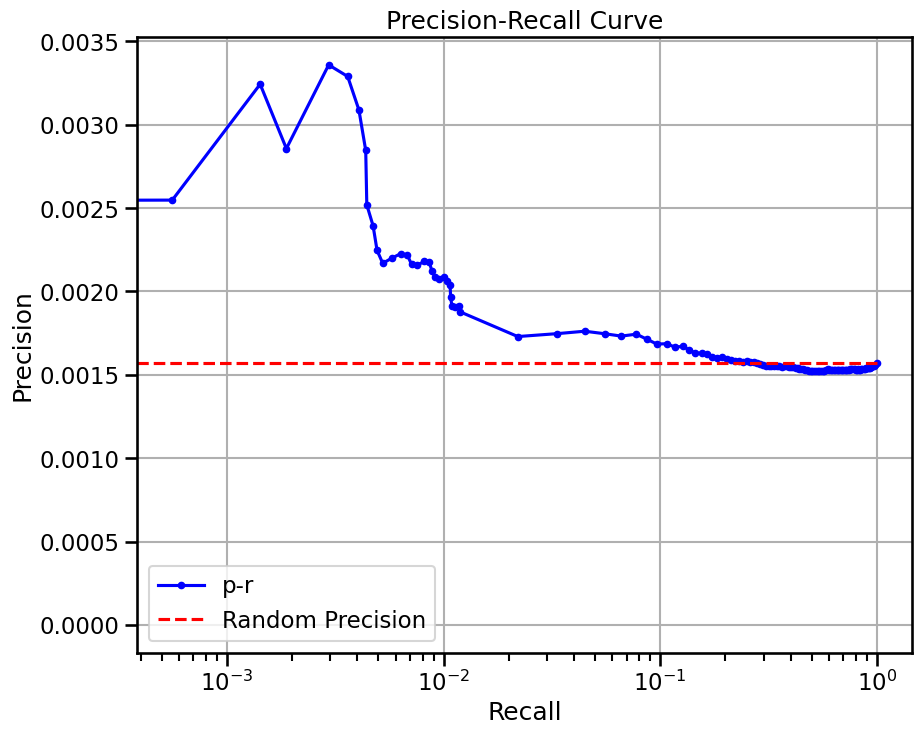

scprint_benchmark2
base enrichment


Top central genes: []


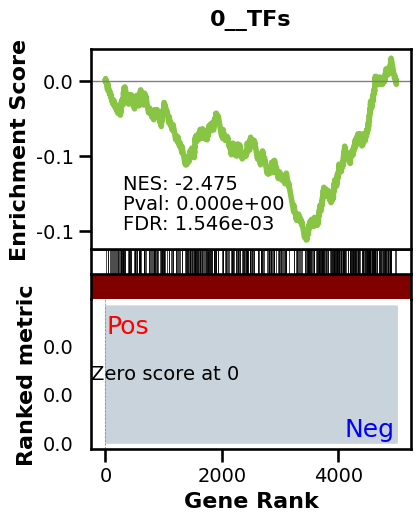

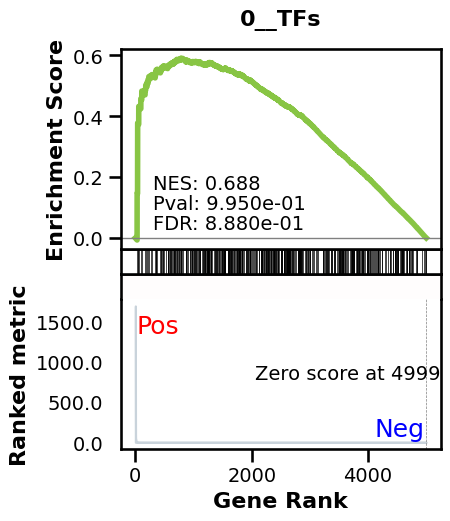

_________________________________________
TF specific enrichment


found some significant results for  12.727272727272727 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.0015724456206874184 
recall:  1.0 
random precision: 0.0015728901911201826



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 53.67it/s]


  9%|▉         | 12/128 [00:00<00:02, 53.67it/s]


 14%|█▍        | 18/128 [00:00<00:02, 53.60it/s]


 19%|█▉        | 24/128 [00:00<00:01, 53.62it/s]


 23%|██▎       | 30/128 [00:00<00:01, 53.68it/s]


 28%|██▊       | 36/128 [00:00<00:01, 53.70it/s]


 33%|███▎      | 42/128 [00:00<00:01, 53.49it/s]


 38%|███▊      | 48/128 [00:00<00:01, 53.53it/s]


 42%|████▏     | 54/128 [00:01<00:01, 53.58it/s]


 47%|████▋     | 60/128 [00:01<00:01, 53.63it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 53.60it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 53.45it/s]


 61%|██████    | 78/128 [00:01<00:00, 53.46it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 53.53it/s]


 70%|███████   | 90/128 [00:01<00:00, 53.55it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 52.27it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 52.67it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 52.96it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 53.18it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 53.32it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 53.43it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 53.36it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0026844362803352863
EPR: 2.2374002946372484


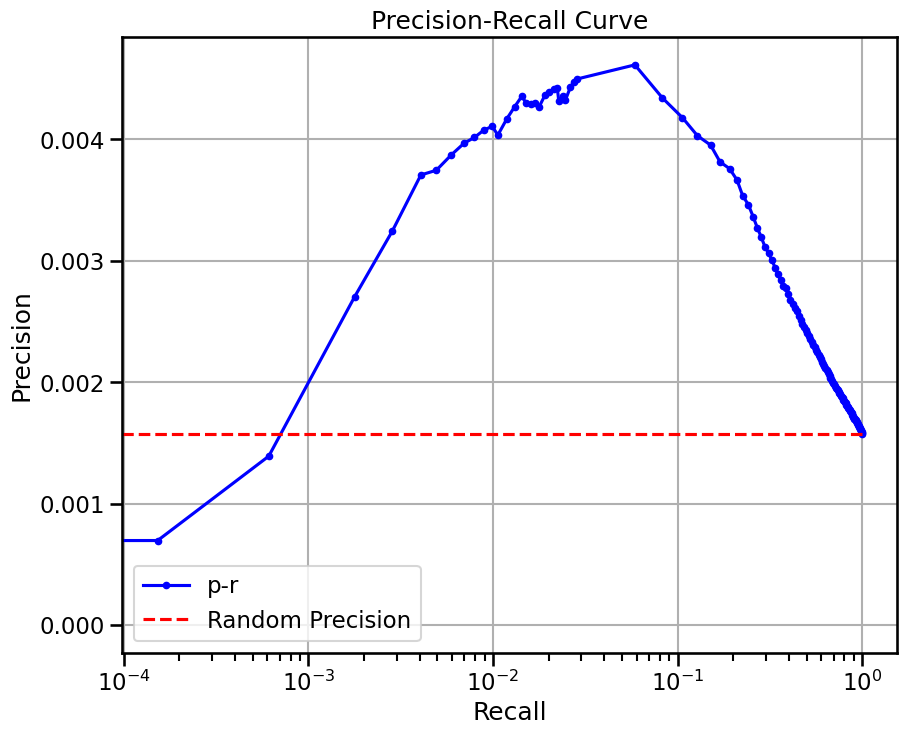


  0%|          | 0/22 [00:00<?, ?it/s]


  5%|▍         | 1/22 [00:01<00:40,  1.94s/it]


  9%|▉         | 2/22 [00:02<00:22,  1.11s/it]


 14%|█▎        | 3/22 [00:04<00:26,  1.41s/it]


 18%|█▊        | 4/22 [00:04<00:17,  1.01it/s]


 23%|██▎       | 5/22 [00:04<00:12,  1.35it/s]


 27%|██▋       | 6/22 [00:05<00:13,  1.18it/s]


 32%|███▏      | 7/22 [00:08<00:21,  1.44s/it]


 36%|███▋      | 8/22 [00:10<00:21,  1.55s/it]


 41%|████      | 9/22 [00:10<00:15,  1.22s/it]


 45%|████▌     | 10/22 [00:11<00:11,  1.07it/s]


 50%|█████     | 11/22 [00:11<00:08,  1.36it/s]


 55%|█████▍    | 12/22 [00:11<00:05,  1.68it/s]


 59%|█████▉    | 13/22 [00:12<00:04,  1.90it/s]


 64%|██████▎   | 14/22 [00:13<00:07,  1.14it/s]


 68%|██████▊   | 15/22 [00:14<00:04,  1.42it/s]


 73%|███████▎  | 16/22 [00:14<00:03,  1.72it/s]


 77%|███████▋  | 17/22 [00:16<00:05,  1.11s/it]


 82%|████████▏ | 18/22 [00:17<00:03,  1.11it/s]


 86%|████████▋ | 19/22 [00:17<00:02,  1.40it/s]


 91%|█████████ | 20/22 [00:17<00:01,  1.70it/s]


 95%|█████████▌| 21/22 [00:17<00:00,  2.01it/s]


100%|██████████| 22/22 [00:18<00:00,  2.33it/s]


100%|██████████| 22/22 [00:18<00:00,  1.19it/s]

base enrichment


Top central genes: []


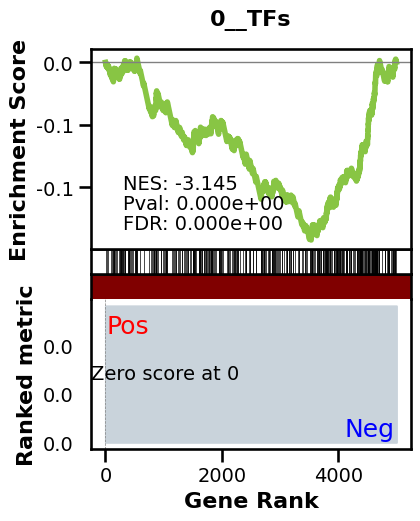

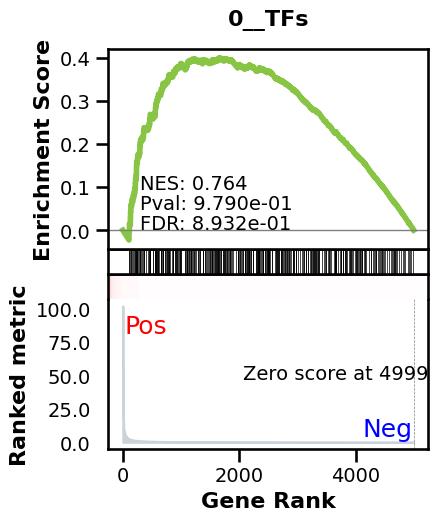

_________________________________________
TF specific enrichment


found some significant results for  27.083333333333332 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.0014142799441978382 
recall:  1.0 
random precision: 0.001414682872956869



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.46it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.44it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.44it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.47it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.47it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.51it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.43it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.47it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.47it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.49it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.51it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.52it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.53it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.54it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.37it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.34it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.41it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.39it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.42it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.48it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.48it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.42it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014109155766944851
EPR: 0.9730204636563655


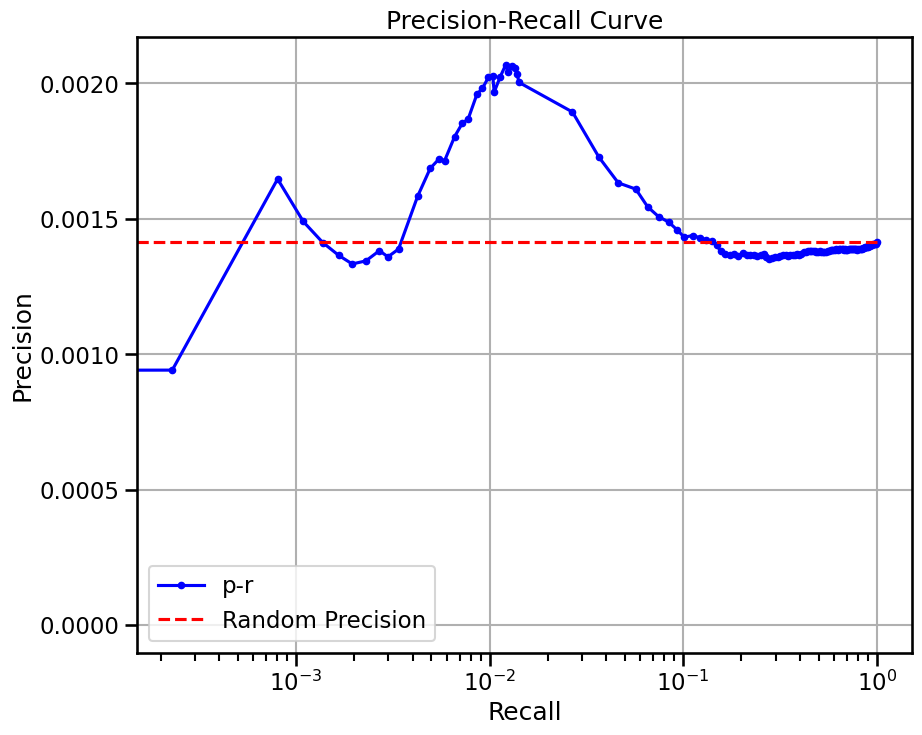

scprint_benchmark2
base enrichment


Top central genes: []


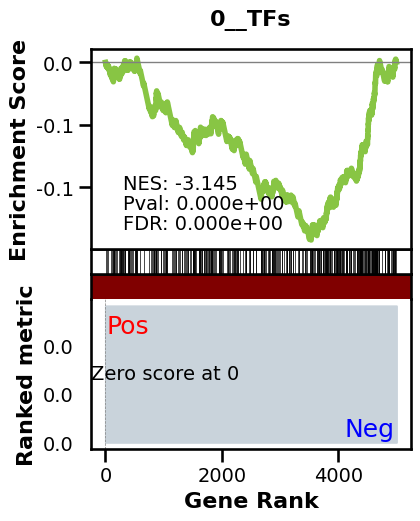

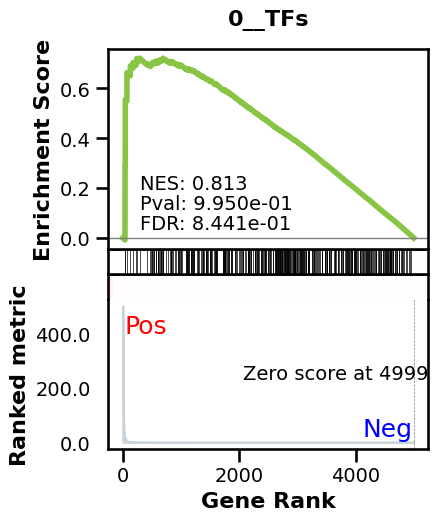

_________________________________________
TF specific enrichment


found some significant results for  6.25 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.0014142799441978382 
recall:  1.0 
random precision: 0.001414682872956869



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 51.44it/s]


  9%|▉         | 12/128 [00:00<00:02, 52.93it/s]


 14%|█▍        | 18/128 [00:00<00:02, 53.86it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.34it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.65it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.17it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.48it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.62it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.77it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.86it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.37it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 54.55it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.69it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 54.80it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.90it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.61it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.56it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.71it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 54.82it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.90it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.96it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.55it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001924479297154917
EPR: 1.0543478995458477


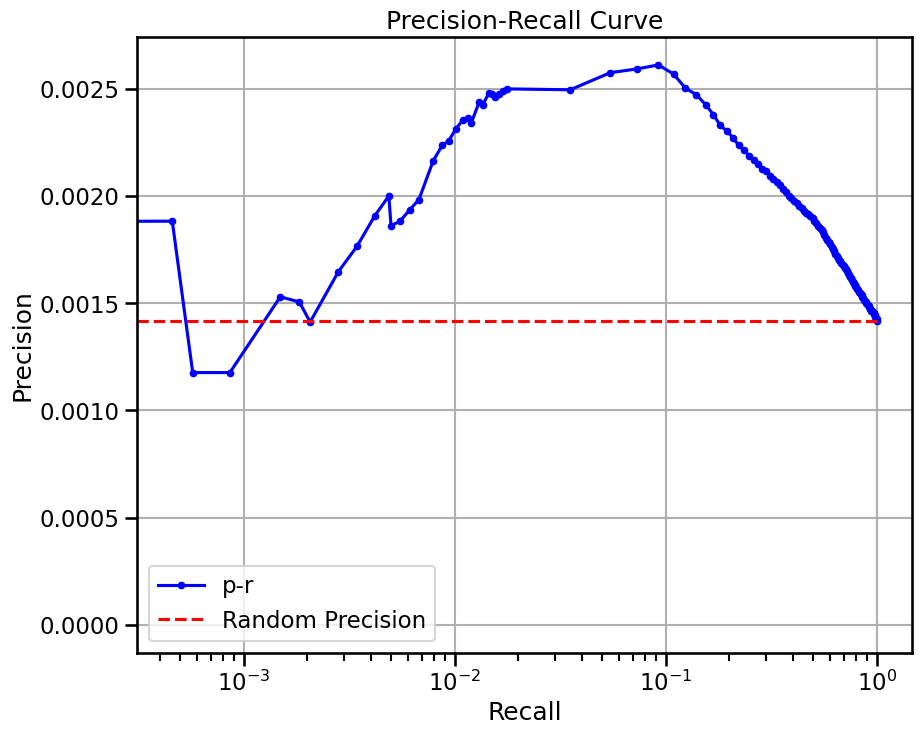


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [00:01<00:03,  1.53s/it]


 67%|██████▋   | 2/3 [00:01<00:00,  1.25it/s]


100%|██████████| 3/3 [00:02<00:00,  1.82it/s]


100%|██████████| 3/3 [00:02<00:00,  1.36it/s]

base enrichment


Top central genes: []


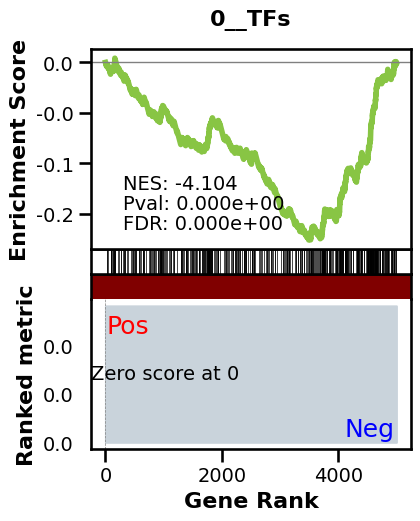

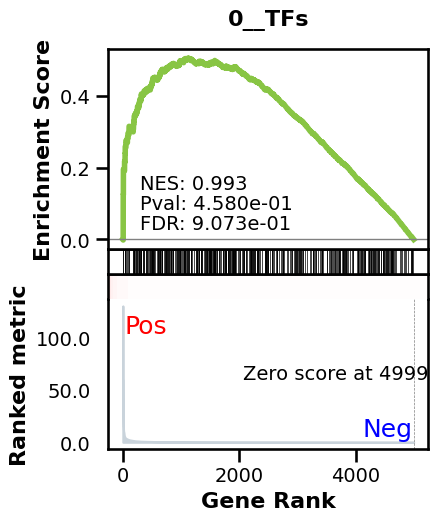

_________________________________________
TF specific enrichment


found some significant results for  19.047619047619047 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3536 genes
intersection pct: 0.7072
precision:  0.0013506038727708277 
recall:  1.0 
random precision: 0.0013509859389300276



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.92it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.92it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.80it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.79it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.75it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.73it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.72it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.46it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.57it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.63it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.64it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 54.65it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.61it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 54.64it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.64it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.62it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.50it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.50it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 54.58it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.63it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.49it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.58it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001376343502218164
EPR: 1.1840667861349274


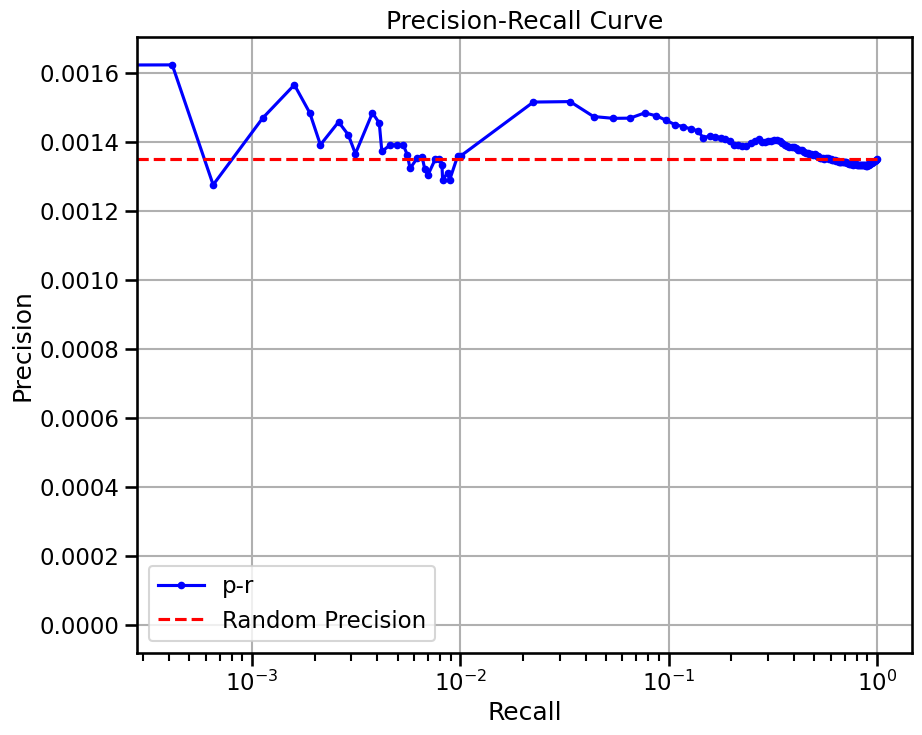

scprint_benchmark2
base enrichment


Top central genes: []


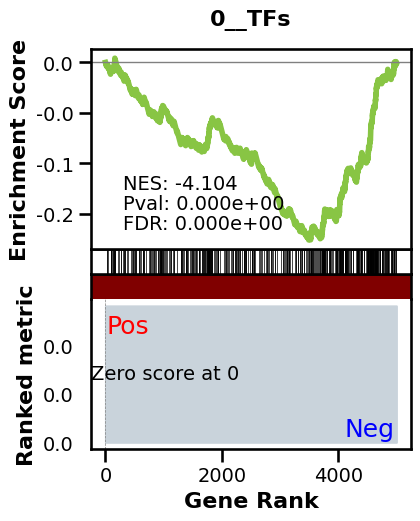

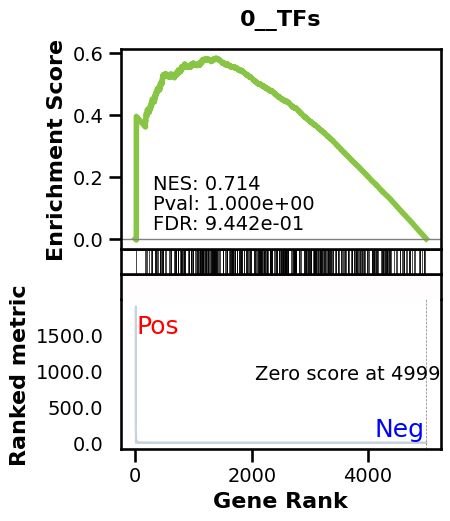

_________________________________________
TF specific enrichment


found some significant results for  11.904761904761905 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3536 genes
intersection pct: 0.7072
precision:  0.0013506038727708277 
recall:  1.0 
random precision: 0.0013509859389300276



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.32it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.24it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.38it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.24it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.21it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.25it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.23it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.20it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.98it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.04it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.14it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.16it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.23it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.20it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.19it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.23it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.20it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.15it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 54.95it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.98it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.01it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.11it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0021994906324290736
EPR: 1.360129823402634


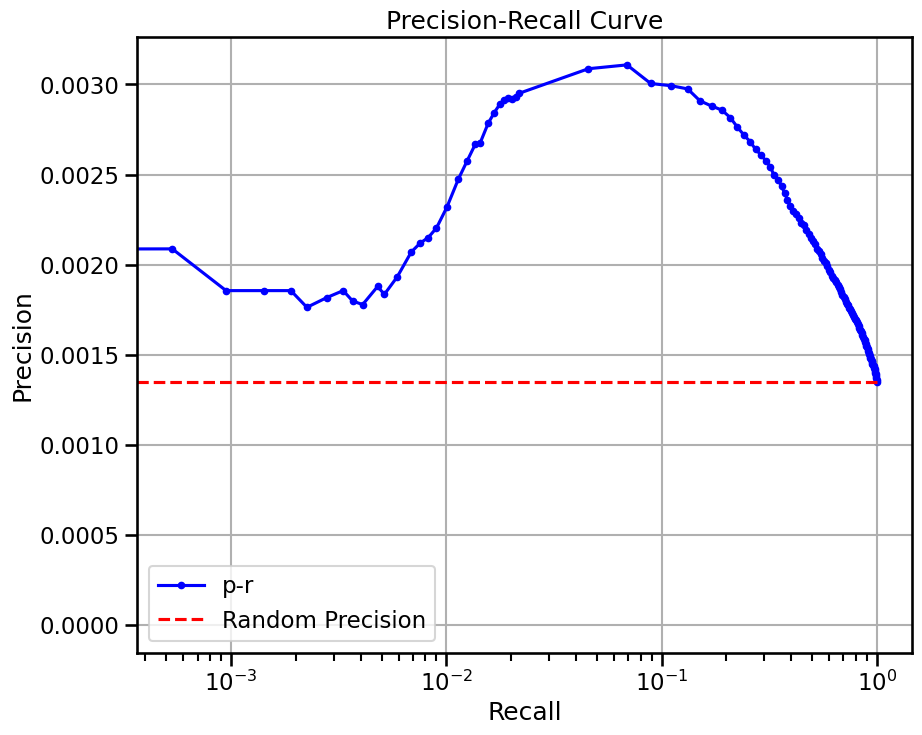


  0%|          | 0/16 [00:00<?, ?it/s]


  6%|▋         | 1/16 [00:01<00:19,  1.29s/it]


 12%|█▎        | 2/16 [00:01<00:09,  1.41it/s]


 19%|█▉        | 3/16 [00:01<00:06,  1.93it/s]


 25%|██▌       | 4/16 [00:02<00:05,  2.33it/s]


 31%|███▏      | 5/16 [00:02<00:04,  2.66it/s]


 38%|███▊      | 6/16 [00:02<00:03,  2.87it/s]


 44%|████▍     | 7/16 [00:03<00:02,  3.05it/s]


 50%|█████     | 8/16 [00:03<00:02,  3.21it/s]


 56%|█████▋    | 9/16 [00:03<00:02,  2.94it/s]


 62%|██████▎   | 10/16 [00:03<00:01,  3.12it/s]


 69%|██████▉   | 11/16 [00:04<00:01,  3.24it/s]


 75%|███████▌  | 12/16 [00:04<00:01,  3.34it/s]


 81%|████████▏ | 13/16 [00:04<00:00,  3.09it/s]


 88%|████████▊ | 14/16 [00:05<00:00,  3.22it/s]


 94%|█████████▍| 15/16 [00:05<00:00,  3.32it/s]


100%|██████████| 16/16 [00:05<00:00,  3.54it/s]


100%|██████████| 16/16 [00:05<00:00,  2.71it/s]

base enrichment


Top central genes: []


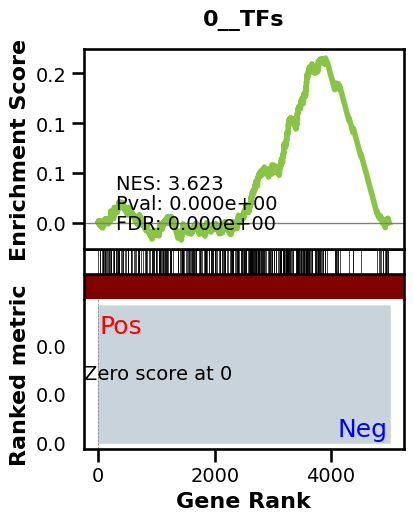

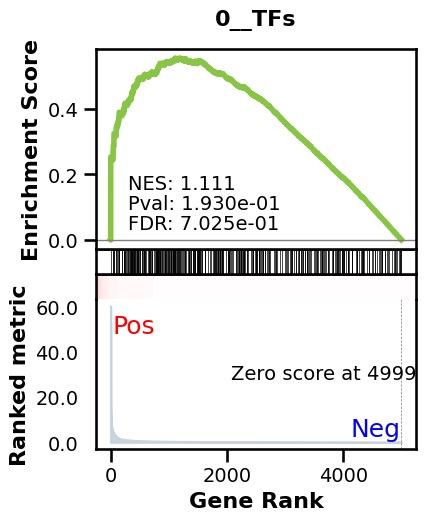

_________________________________________
TF specific enrichment


found some significant results for  12.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2763 genes
intersection pct: 0.5526
precision:  0.0013802419097612326 
recall:  1.0 
random precision: 0.0013807416352897488



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 91.99it/s]


 16%|█▌        | 20/128 [00:00<00:01, 92.11it/s]


 23%|██▎       | 30/128 [00:00<00:01, 92.17it/s]


 31%|███▏      | 40/128 [00:00<00:00, 92.20it/s]


 39%|███▉      | 50/128 [00:00<00:00, 92.06it/s]


 47%|████▋     | 60/128 [00:00<00:00, 91.99it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 91.12it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 91.53it/s]


 70%|███████   | 90/128 [00:00<00:00, 91.74it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 91.93it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 92.03it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 92.08it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 91.90it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014651834145545791
EPR: 0.8244063439046271


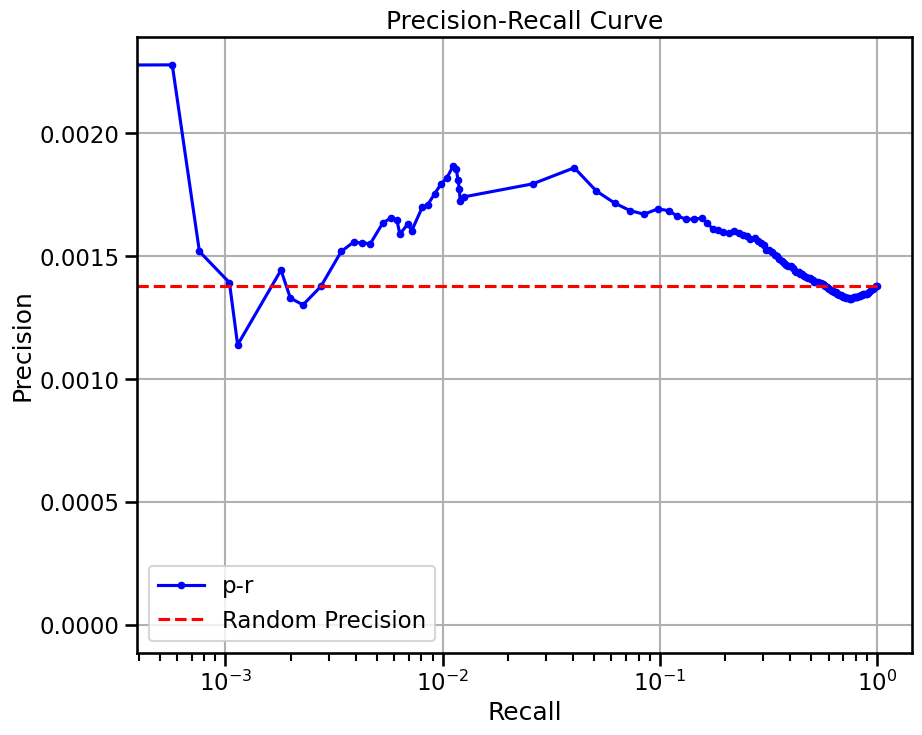

scprint_benchmark2
base enrichment


Top central genes: []


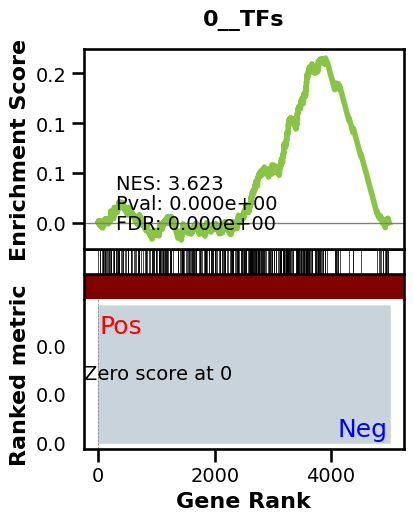

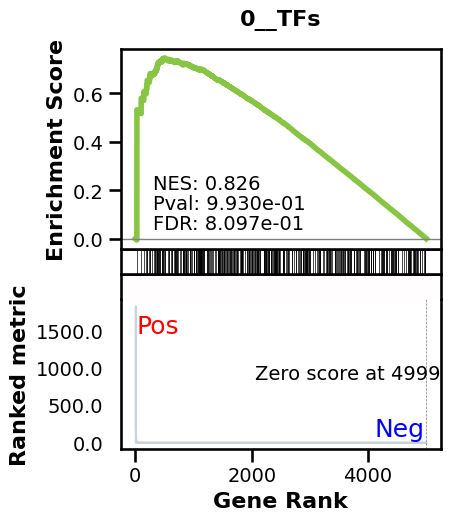

_________________________________________
TF specific enrichment


found some significant results for  8.333333333333334 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2763 genes
intersection pct: 0.5526
precision:  0.0013802419097612326 
recall:  1.0 
random precision: 0.0013807416352897488



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 90.28it/s]


 16%|█▌        | 20/128 [00:00<00:01, 90.71it/s]


 23%|██▎       | 30/128 [00:00<00:01, 90.89it/s]


 31%|███▏      | 40/128 [00:00<00:00, 90.89it/s]


 39%|███▉      | 50/128 [00:00<00:00, 90.99it/s]


 47%|████▋     | 60/128 [00:00<00:00, 91.00it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 91.12it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 90.90it/s]


 70%|███████   | 90/128 [00:00<00:00, 90.58it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 90.75it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 89.30it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 89.76it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 90.41it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0024383941144785846
EPR: 1.929480742419434


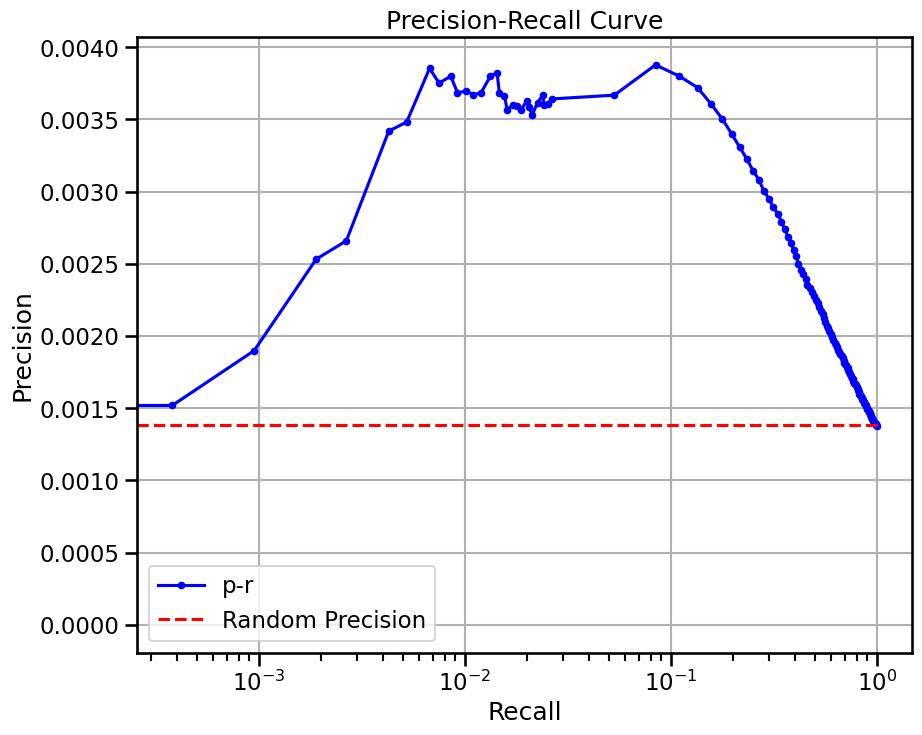


  0%|          | 0/12 [00:00<?, ?it/s]


  8%|▊         | 1/12 [00:01<00:14,  1.35s/it]


 17%|█▋        | 2/12 [00:01<00:07,  1.38it/s]


 25%|██▌       | 3/12 [00:01<00:04,  1.92it/s]


 33%|███▎      | 4/12 [00:02<00:03,  2.35it/s]


 42%|████▏     | 5/12 [00:02<00:02,  2.66it/s]


 50%|█████     | 6/12 [00:03<00:02,  2.13it/s]


 58%|█████▊    | 7/12 [00:03<00:02,  2.46it/s]


 67%|██████▋   | 8/12 [00:03<00:01,  2.74it/s]


 75%|███████▌  | 9/12 [00:03<00:01,  2.98it/s]


 83%|████████▎ | 10/12 [00:04<00:00,  3.16it/s]


 92%|█████████▏| 11/12 [00:04<00:00,  3.31it/s]


100%|██████████| 12/12 [00:04<00:00,  3.92it/s]


100%|██████████| 12/12 [00:04<00:00,  2.50it/s]

base enrichment


Top central genes: []


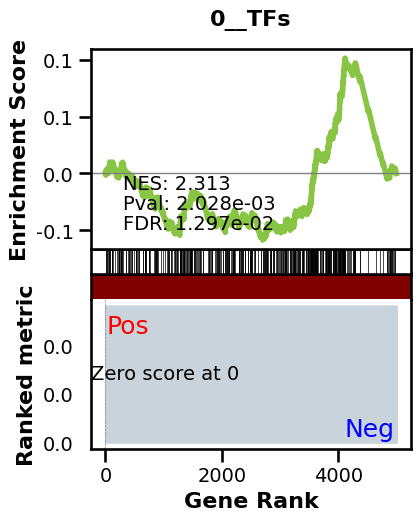

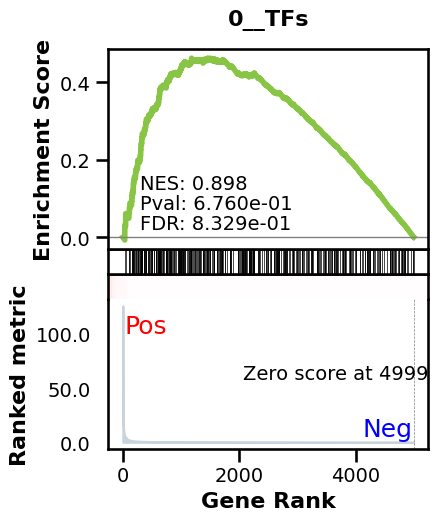

_________________________________________
TF specific enrichment


found some significant results for  12.962962962962964 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.00138142053605649 
recall:  1.0 
random precision: 0.001381856590518629



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 68.27it/s]


 11%|█         | 14/128 [00:00<00:01, 68.28it/s]


 16%|█▋        | 21/128 [00:00<00:01, 68.32it/s]


 22%|██▏       | 28/128 [00:00<00:01, 68.34it/s]


 27%|██▋       | 35/128 [00:00<00:01, 68.40it/s]


 33%|███▎      | 42/128 [00:00<00:01, 68.38it/s]


 38%|███▊      | 49/128 [00:00<00:01, 68.39it/s]


 44%|████▍     | 56/128 [00:00<00:01, 68.37it/s]


 49%|████▉     | 63/128 [00:00<00:00, 68.36it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 68.37it/s]


 60%|██████    | 77/128 [00:01<00:00, 68.34it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 68.36it/s]


 71%|███████   | 91/128 [00:01<00:00, 68.41it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 68.27it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 68.28it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 68.26it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 68.29it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 68.31it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 68.29it/s]

Area Under Precision-Recall Curve (AUPRC):  0.00147124202719192
EPR: 1.3575898317283328


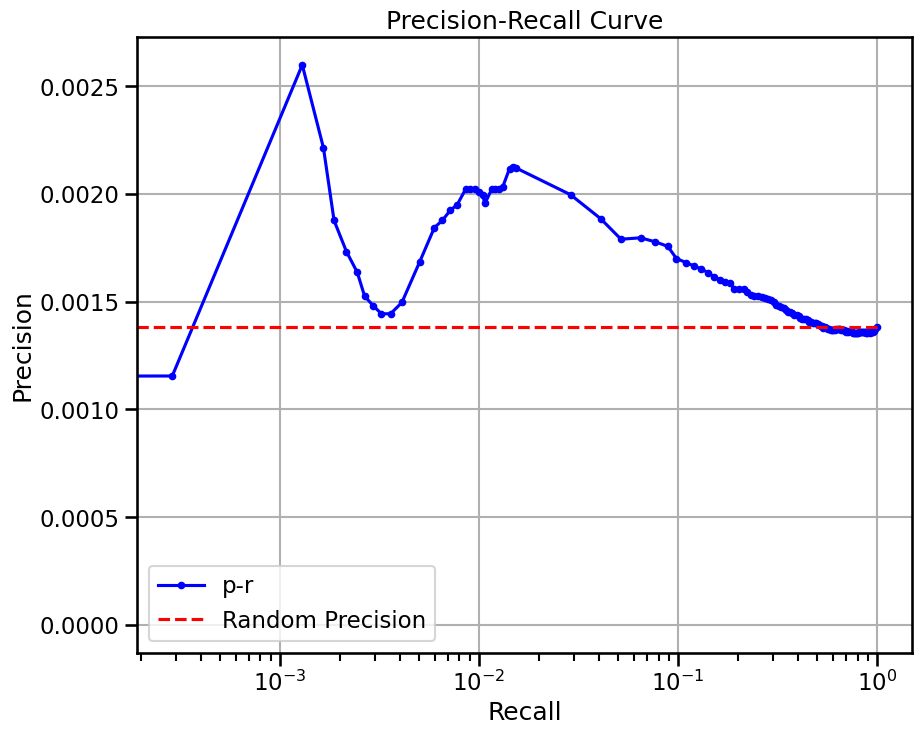

scprint_benchmark2
base enrichment


Top central genes: []


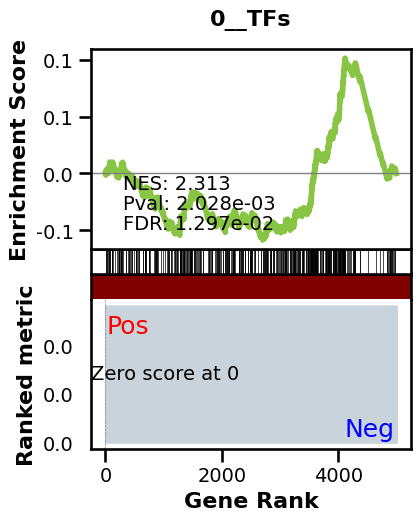

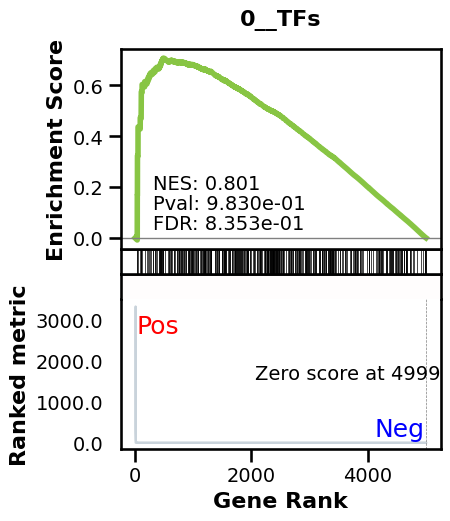

_________________________________________
TF specific enrichment


found some significant results for  12.962962962962964 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.00138142053605649 
recall:  1.0 
random precision: 0.001381856590518629



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 68.26it/s]


 11%|█         | 14/128 [00:00<00:01, 68.46it/s]


 16%|█▋        | 21/128 [00:00<00:01, 68.58it/s]


 22%|██▏       | 28/128 [00:00<00:01, 68.53it/s]


 27%|██▋       | 35/128 [00:00<00:01, 68.48it/s]


 33%|███▎      | 42/128 [00:00<00:01, 68.59it/s]


 38%|███▊      | 49/128 [00:00<00:01, 68.63it/s]


 44%|████▍     | 56/128 [00:00<00:01, 68.66it/s]


 49%|████▉     | 63/128 [00:00<00:00, 68.62it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 68.61it/s]


 60%|██████    | 77/128 [00:01<00:00, 68.64it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 68.64it/s]


 71%|███████   | 91/128 [00:01<00:00, 68.70it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 68.64it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 68.53it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 68.55it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 68.60it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 68.66it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 68.56it/s]

Area Under Precision-Recall Curve (AUPRC):  0.00277489420125601
EPR: 2.1981100642995877


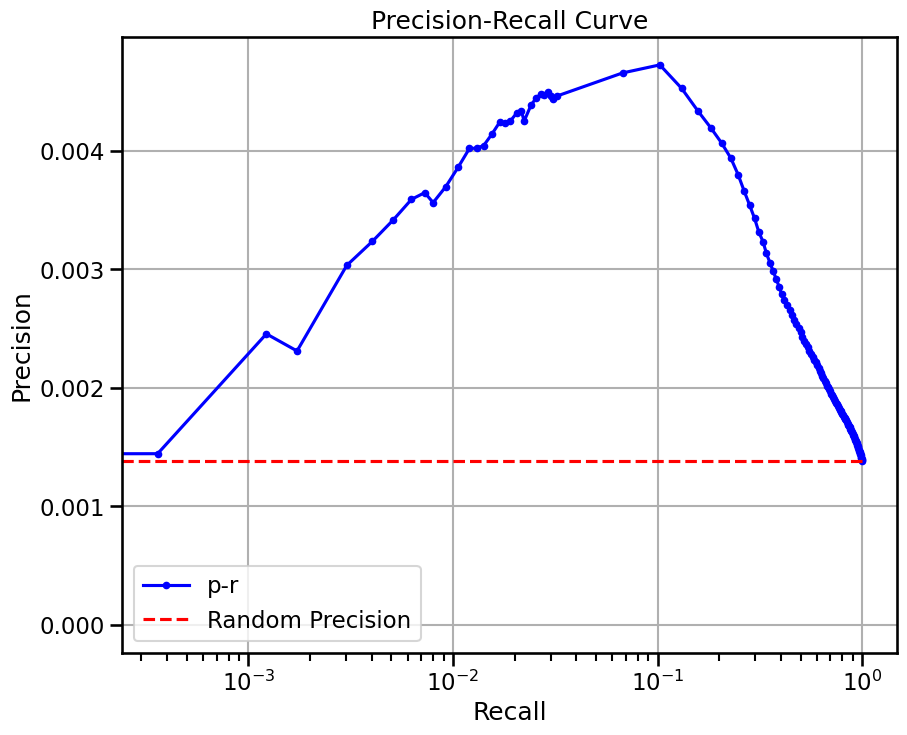


  0%|          | 0/64 [00:00<?, ?it/s]


  2%|▏         | 1/64 [00:01<01:26,  1.38s/it]


  3%|▎         | 2/64 [00:01<00:48,  1.29it/s]


  5%|▍         | 3/64 [00:02<00:34,  1.77it/s]


  6%|▋         | 4/64 [00:02<00:30,  1.99it/s]


  8%|▊         | 5/64 [00:02<00:26,  2.24it/s]


  9%|▉         | 6/64 [00:03<00:23,  2.48it/s]


 11%|█         | 7/64 [00:03<00:21,  2.70it/s]


 12%|█▎        | 8/64 [00:03<00:20,  2.76it/s]


 14%|█▍        | 9/64 [00:04<00:19,  2.80it/s]


 16%|█▌        | 10/64 [00:04<00:18,  2.94it/s]


 17%|█▋        | 11/64 [00:04<00:17,  3.08it/s]


 19%|█▉        | 12/64 [00:05<00:17,  3.03it/s]


 20%|██        | 13/64 [00:05<00:17,  2.87it/s]


 22%|██▏       | 14/64 [00:05<00:16,  3.02it/s]


 23%|██▎       | 15/64 [00:06<00:16,  3.05it/s]


 25%|██▌       | 16/64 [00:06<00:15,  3.03it/s]


 27%|██▋       | 17/64 [00:06<00:15,  3.03it/s]


 28%|██▊       | 18/64 [00:07<00:14,  3.12it/s]


 30%|██▉       | 19/64 [00:07<00:17,  2.56it/s]


 31%|███▏      | 20/64 [00:07<00:15,  2.75it/s]


 33%|███▎      | 21/64 [00:08<00:15,  2.79it/s]


 34%|███▍      | 22/64 [00:08<00:14,  2.99it/s]


 36%|███▌      | 23/64 [00:08<00:12,  3.16it/s]


 38%|███▊      | 24/64 [00:09<00:12,  3.30it/s]


 39%|███▉      | 25/64 [00:09<00:11,  3.40it/s]


 41%|████      | 26/64 [00:10<00:19,  1.95it/s]


 42%|████▏     | 27/64 [00:10<00:16,  2.24it/s]


 44%|████▍     | 28/64 [00:10<00:14,  2.51it/s]


 45%|████▌     | 29/64 [00:11<00:12,  2.74it/s]


 47%|████▋     | 30/64 [00:11<00:11,  2.91it/s]


 48%|████▊     | 31/64 [00:11<00:10,  3.06it/s]


 50%|█████     | 32/64 [00:12<00:10,  3.16it/s]


 52%|█████▏    | 33/64 [00:12<00:09,  3.23it/s]


 53%|█████▎    | 34/64 [00:12<00:09,  3.28it/s]


 55%|█████▍    | 35/64 [00:12<00:08,  3.35it/s]


 56%|█████▋    | 36/64 [00:13<00:08,  3.40it/s]


 58%|█████▊    | 37/64 [00:13<00:07,  3.39it/s]


 59%|█████▉    | 38/64 [00:13<00:07,  3.39it/s]


 61%|██████    | 39/64 [00:14<00:07,  3.43it/s]


 62%|██████▎   | 40/64 [00:14<00:06,  3.45it/s]


 64%|██████▍   | 41/64 [00:14<00:06,  3.45it/s]


 66%|██████▌   | 42/64 [00:14<00:06,  3.48it/s]


 67%|██████▋   | 43/64 [00:15<00:06,  3.18it/s]


 69%|██████▉   | 44/64 [00:15<00:06,  3.20it/s]


 70%|███████   | 45/64 [00:15<00:05,  3.21it/s]


 72%|███████▏  | 46/64 [00:16<00:05,  3.20it/s]


 73%|███████▎  | 47/64 [00:16<00:05,  3.21it/s]


 75%|███████▌  | 48/64 [00:16<00:04,  3.24it/s]


 77%|███████▋  | 49/64 [00:17<00:04,  3.27it/s]


 78%|███████▊  | 50/64 [00:17<00:04,  3.34it/s]


 80%|███████▉  | 51/64 [00:17<00:03,  3.36it/s]


 81%|████████▏ | 52/64 [00:18<00:03,  3.23it/s]


 83%|████████▎ | 53/64 [00:18<00:03,  3.33it/s]


 84%|████████▍ | 54/64 [00:18<00:02,  3.40it/s]


 86%|████████▌ | 55/64 [00:18<00:02,  3.45it/s]


 88%|████████▊ | 56/64 [00:19<00:02,  3.48it/s]


 89%|████████▉ | 57/64 [00:19<00:02,  3.34it/s]


 91%|█████████ | 58/64 [00:20<00:02,  2.72it/s]


 92%|█████████▏| 59/64 [00:20<00:01,  2.91it/s]


 94%|█████████▍| 60/64 [00:20<00:01,  3.06it/s]


 95%|█████████▌| 61/64 [00:20<00:00,  3.19it/s]


 97%|█████████▋| 62/64 [00:21<00:00,  3.29it/s]


 98%|█████████▊| 63/64 [00:21<00:00,  3.36it/s]


100%|██████████| 64/64 [00:21<00:00,  3.39it/s]


100%|██████████| 64/64 [00:21<00:00,  2.92it/s]

base enrichment


Top central genes: []


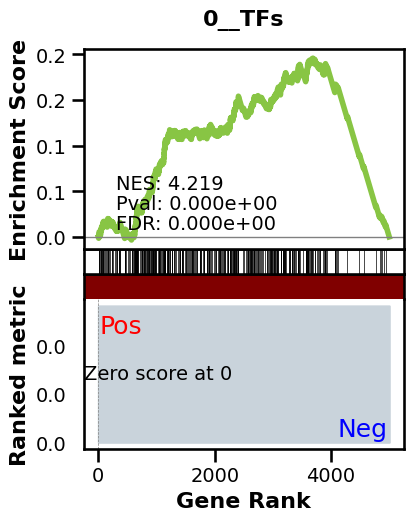

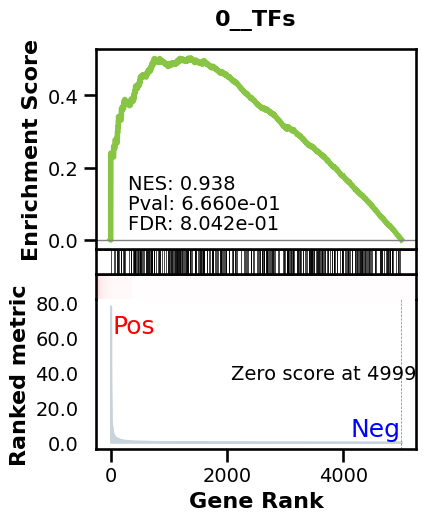

_________________________________________
TF specific enrichment


found some significant results for  27.272727272727273 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.0012886384835366833 
recall:  1.0 
random precision: 0.0012891150510231984



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 97.44it/s]


 16%|█▌        | 20/128 [00:00<00:01, 97.70it/s]


 23%|██▎       | 30/128 [00:00<00:01, 97.67it/s]


 31%|███▏      | 40/128 [00:00<00:00, 97.75it/s]


 39%|███▉      | 50/128 [00:00<00:00, 97.72it/s]


 47%|████▋     | 60/128 [00:00<00:00, 97.72it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 97.72it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 97.63it/s]


 70%|███████   | 90/128 [00:00<00:00, 97.57it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 97.46it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 96.77it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 96.98it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 97.34it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0012483465849930674
EPR: 0.904750365969188


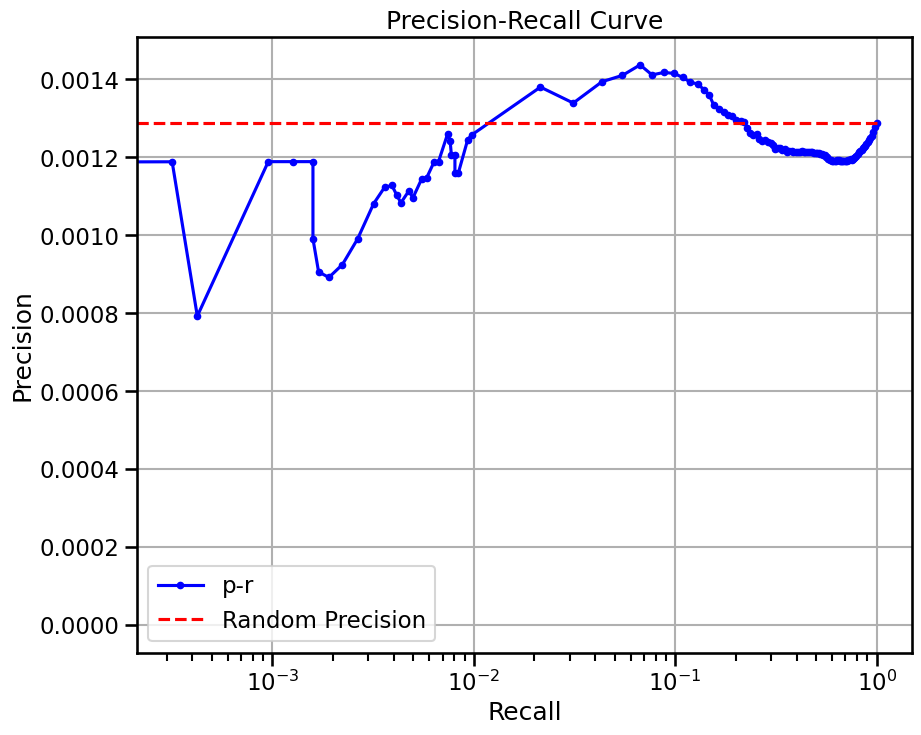

scprint_benchmark2
base enrichment


Top central genes: []


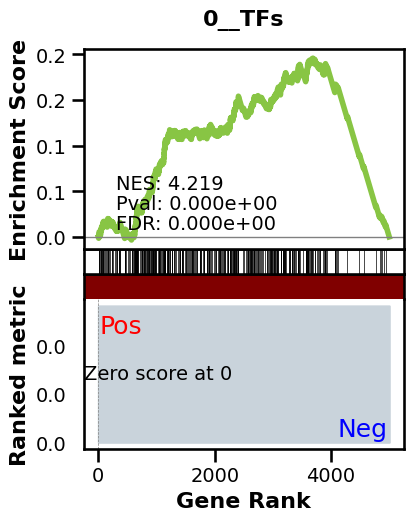

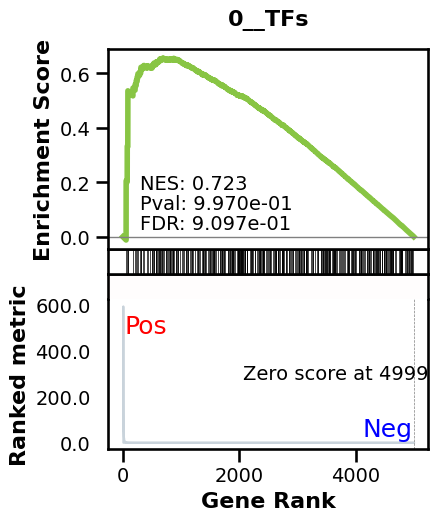

_________________________________________
TF specific enrichment


found some significant results for  9.090909090909092 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.0012886384835366833 
recall:  1.0 
random precision: 0.0012891150510231984



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 95.58it/s]


 16%|█▌        | 20/128 [00:00<00:01, 95.78it/s]


 23%|██▎       | 30/128 [00:00<00:01, 95.83it/s]


 31%|███▏      | 40/128 [00:00<00:00, 95.78it/s]


 39%|███▉      | 50/128 [00:00<00:00, 95.79it/s]


 47%|████▋     | 60/128 [00:00<00:00, 95.80it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 95.80it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 95.82it/s]


 70%|███████   | 90/128 [00:00<00:00, 95.78it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 95.77it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 95.77it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 95.80it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 95.39it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0018575511248075992
EPR: 1.2347998377313367


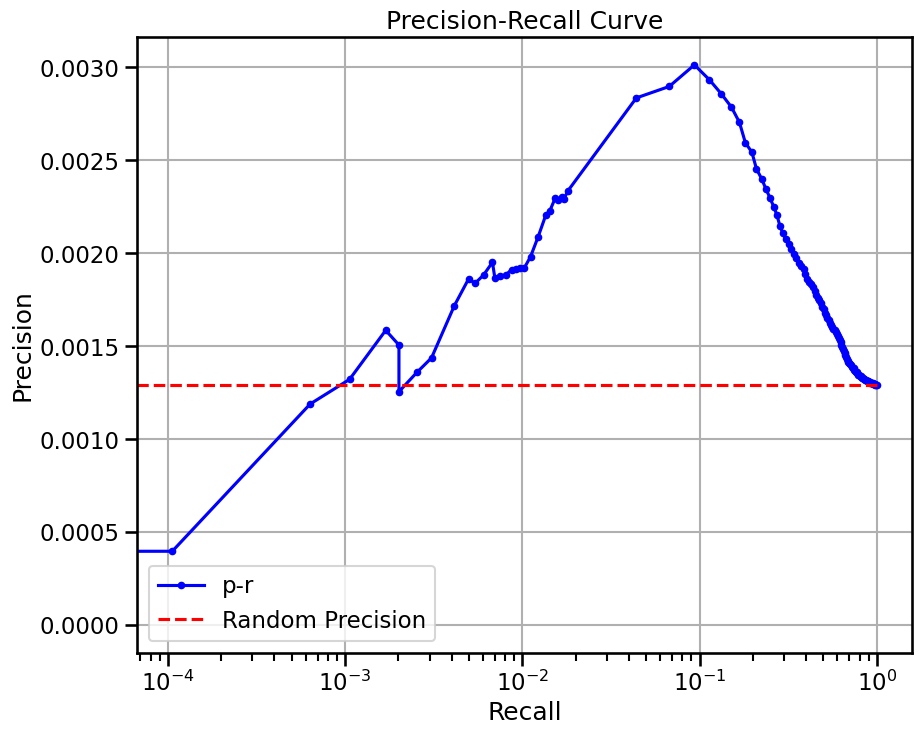

In [7]:
metrics = {}
clf_omni = None
for celltype in CELLTYPES:
    #grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
    #                     how="random expr",
    #                     preprocess="softmax",
    #                     head_agg='mean',
    #                     filtration="none",
    #                     forward_mode="none",
    #                     organisms=['NCBITaxon:9606','NCBITaxon:10090'],
    #                     num_genes=2200,
    #                     max_cells=MAXCELLS,
    #                     doplot=False,
    #                     batch_size=32,
    #                     )
    #grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    #grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    #metrics[celltype+'_scprint_full'] = BenGRN(grn).scprint_benchmark()
    #del grn
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                         how="most var across",
                         preprocess="softmax",
                         head_agg='none',
                         filtration="none",
                         forward_mode="none",
                         num_genes=NUM_GENES,
                         max_cells=1024,
                         doplot=False,
                         batch_size=16,
                         )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    grn.varp['all'] = grn.varp['GRN']
    grn.varp['GRN'] = grn.varp['GRN'][:,:,:].mean(-1)
    metrics[celltype+'_scprint_mean'] = BenGRN(grn).scprint_benchmark()
    
    if clf_omni == None:
        grn.varp['GRN'] = grn.varp['all']
        print("train classifier")
        _, m, clf_omni = train_classifier(grn, C=1, train_size=0.7, class_weight={
                                        1: 200, 0: 1}, shuffle=True, max_iter=200, return_full=False)
        joblib.dump(clf_omni, 'clf_omni.pkl')
    grn.varp['GRN'] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1)
    print("scprint_benchmark2")
    metrics[celltype+'_scprint_class'] = BenGRN(grn).scprint_benchmark()
    del grn

In [8]:
metrics

{'kidney distal convoluted tubule epithelial cell_scprint_mean': {'TF_enr': True,
  'enriched_terms_Regulators': ['celltype.gmt__Cholangiocytes',
   'celltype.gmt__Distal tubule cells',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Beta cells',
   'celltype.gmt__Ductal cells',
   'celltype.gmt__Proximal tubule cells',
   'celltype.gmt__Gamma (PP) cells',
   'celltype.gmt__Connecting tubule cells',
   'celltype.gmt__Delta cells',
   'celltype.gmt__-intercalated cells (Collecting duct system)',
   'celltype.gmt__Hepatocytes'],
  'significant_enriched_TFtargets': 14.705882352941176,
  'precision': 0.0008261483363013599,
  'recall': 1.0,
  'rand_precision': 0.0008263855307705822,
  'auprc': 0.0007981509093624338,
  'epr': 2.6620469453287052},
 'kidney distal convoluted tubule epithelial cell_scprint_class': {'TF_enr': True,
  'enriched_terms_Regulators': ['celltype.gmt__Beta cells',
   'celltype.gmt__Cholangiocytes',
   'celltype.gmt__Distal tubule cells',
   'celltype.gmt__Loo

In [9]:
import pandas as pd

In [10]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], k.split('_')[0], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['tools','name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

,tools,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only
0,mean,kidney distal convoluted tubule epithelial cell,2.662047,0.000798,0.000826,14.705882,True,False
1,class,kidney distal convoluted tubule epithelial cell,2.905213,0.001110,0.000826,17.647059,True,False
2,mean,kidney loop of Henle thick ascending limb epit...,3.452881,0.000782,0.000834,23.076923,True,False
3,class,kidney loop of Henle thick ascending limb epit...,4.571185,0.000967,0.000834,26.923077,True,False
4,mean,kidney collecting duct principal cell,1.122309,0.001229,0.001259,14.062500,True,False
5,class,kidney collecting duct principal cell,1.122309,0.001771,0.001259,29.687500,True,False
6,mean,mesangial cell,2.208943,0.001171,0.001044,15.625000,True,False
7,class,mesangial cell,3.262414,0.001829,0.001044,46.875000,True,False
8,mean,blood vessel smooth muscle cell,2.139467,0.001580,0.001573,36.363636,True,False
9,class,blood vessel smooth muscle cell,2.237400,0.002684,0.001573,12.727273,True,False
